# Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Import and Preview Training Values and Labels

In [2]:
# Import training set values file

df_values = pd.read_csv('trainingsetvalues.csv')
pd.set_option('display.max_columns', None)
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# Explore column count and data types

df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

### Feature engineer a 'well_age' column

In [4]:
# Upon initial analyzization of the dataset I noticed date_recorded and construction_year could be combined to retrive
# the age of the well site

In [5]:
df_values['year_recorded'] = pd.to_datetime(df_values['date_recorded']).dt.year
print(df_values['year_recorded'].head())
print(df_values['year_recorded'].value_counts())

0    2011
1    2013
2    2013
3    2013
4    2011
Name: year_recorded, dtype: int64
2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64


In [6]:
df_values['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [7]:
df_values['construction_year'].mean

<bound method Series.mean of 0        1999
1        2010
2        2009
3        1986
4           0
5        2009
6           0
7           0
8           0
9           0
10       2011
11       1987
12          0
13       2009
14          0
15       1991
16       1978
17       1978
18       1999
19       1992
20       2008
21          0
22       1978
23       2011
24       2009
25       1974
26       2011
27          0
28       2000
29       2002
         ... 
59370       0
59371       0
59372       0
59373    1988
59374       0
59375    2005
59376    1990
59377       0
59378    2008
59379       0
59380    1999
59381    1992
59382    2008
59383    2008
59384       0
59385    2011
59386    2009
59387    2000
59388    1995
59389    2009
59390    1991
59391    1967
59392       0
59393       0
59394    2007
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 59400, dtype: int64>

In [8]:
df_values['construction_year'] = df_values['construction_year'].replace({0:1999})

In [9]:
df_values['construction_year'].value_counts()

1999    21688
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [10]:
df_values['well_age'] = df_values['year_recorded'] - df_values['construction_year']

In [11]:
df_values['well_age'] = df_values['well_age'].replace({-1:12, -2:12, -3:12, -4:12, -5:12, -7:12})

In [12]:
df_values['well_age'].value_counts()

12    13911
13     7011
14     3370
3      2741
1      2303
2      2129
5      1993
4      1890
7      1404
6      1381
11     1352
8      1160
33     1120
15      993
23      905
10      868
16      826
9       814
19      766
27      762
18      754
31      709
28      709
35      647
17      636
39      601
37      600
26      589
0       588
25      583
21      578
29      564
20      541
41      488
30      359
43      356
38      351
36      325
22      323
24      261
40      233
34      184
32      174
53       91
42       90
50       84
45       66
46       48
44       47
48       41
51       31
49       25
47       14
52       11
Name: well_age, dtype: int64

In [13]:
df_values.drop(columns = ['date_recorded', 'year_recorded', 'construction_year'], axis = 1, inplace = True)

In [14]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 39 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object
s

### Handle null/missing values

In [15]:
# Inspect features for missing values

df_values.isnull().sum()

id                           0
amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

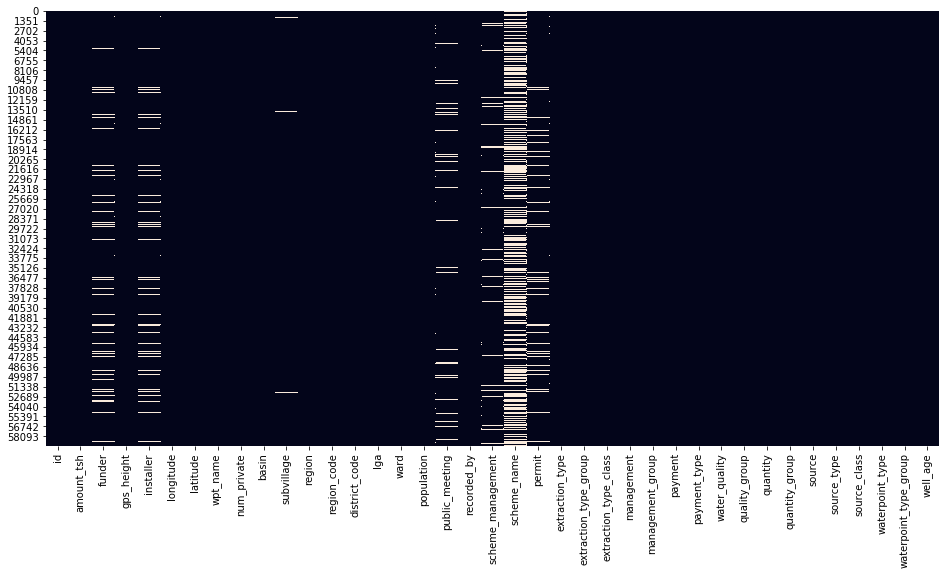

In [16]:
# Generate a heatmap to visualize the distribution of missing values

plt.figure(figsize = (16,8))
sns.heatmap(df_values.isnull(), cbar=False)

In [17]:
# The columns funder, installer, public_meeting, scheme_management, and permit are all missing over 3,000 entries
# Subvillage is missing 371 and scheme_name is missing 28,166

In [18]:
# Explore missing values by column

In [19]:
df_values['funder'].value_counts(normalize = True)

Government Of Tanzania          0.162898
Danida                          0.055841
Hesawa                          0.039487
Rwssp                           0.024639
World Bank                      0.024191
Kkkt                            0.023079
World Vision                    0.022344
Unicef                          0.018955
Tasaf                           0.015727
District Council                0.015117
Dhv                             0.014866
Private Individual              0.014812
Dwsp                            0.014543
0                               0.013933
Norad                           0.013718
Germany Republi                 0.010939
Tcrs                            0.010795
Ministry Of Water               0.010580
Water                           0.010455
Dwe                             0.008679
Netherlands                     0.008428
Hifab                           0.008070
Adb                             0.008034
Lga                             0.007926
Amref           

In [20]:
df_values['installer'].value_counts(normalize = True)

DWE                        0.312171
Government                 0.032738
RWE                        0.021634
Commu                      0.019015
DANIDA                     0.018836
KKKT                       0.016109
Hesawa                     0.015069
0                          0.013938
TCRS                       0.012683
Central government         0.011158
CES                        0.010943
Community                  0.009920
DANID                      0.009902
District Council           0.009884
HESAWA                     0.009669
LGA                        0.007319
World vision               0.007319
WEDECO                     0.007122
TASAF                      0.007104
District council           0.007032
Gover                      0.006871
AMREF                      0.005902
TWESA                      0.005669
WU                         0.005400
Dmdd                       0.005148
ACRA                       0.004987
World Vision               0.004843
SEMA                       0

In [21]:
df_values['public_meeting'].value_counts(normalize = True)

True     0.909838
False    0.090162
Name: public_meeting, dtype: float64

In [22]:
df_values['scheme_management'].value_counts(normalize = True)

VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64

In [23]:
df_values['permit'].value_counts(normalize = True)

True     0.68955
False    0.31045
Name: permit, dtype: float64

In [24]:
df_values['subvillage'].value_counts(normalize = True)

Madukani        0.008606
Shuleni         0.008572
Majengo         0.008504
Kati            0.006319
Mtakuja         0.004438
Sokoni          0.003930
M               0.003168
Muungano        0.002914
Mbuyuni         0.002778
Mlimani         0.002575
Songambele      0.002490
Miembeni        0.002270
Msikitini       0.002270
1               0.002236
Kibaoni         0.001931
Kanisani        0.001880
Mapinduzi       0.001847
I               0.001847
Mjimwema        0.001830
Mjini           0.001830
Mkwajuni        0.001762
Mwenge          0.001728
Mabatini        0.001660
Azimio          0.001660
Mbugani         0.001609
Mission         0.001609
Bwawani         0.001542
Bondeni         0.001525
Chang'Ombe      0.001491
Zahanati        0.001457
                  ...   
Masanze         0.000017
Mwamakoja       0.000017
Chankanga       0.000017
Dova            0.000017
Mwabsragi       0.000017
Ngunduzi        0.000017
Geza Ndani      0.000017
Nyabintu A      0.000017
Keisunguruta    0.000017


In [25]:
df_values['scheme_name'].value_counts(normalize = True)

K                                        0.021835
None                                     0.020619
Borehole                                 0.017481
Chalinze wate                            0.012967
M                                        0.012807
DANIDA                                   0.012134
Government                               0.010245
Ngana water supplied scheme              0.008644
wanging'ombe water supply s              0.008356
wanging'ombe supply scheme               0.007492
I                                        0.007332
Bagamoyo wate                            0.007332
Uroki-Bomang'ombe water sup              0.006691
N                                        0.006531
Kirua kahe gravity water supply trust    0.006179
Machumba estate pipe line                0.005923
Makwale water supplied sche              0.005315
Kijiji                                   0.005155
S                                        0.004931
Handeni Trunk Main(H                     0.004866


In [26]:
# Due to the number of missing values and different categories, scheme_name will be dropped.

# Subvillage will be dropped due to the number of different categories

# Public_meeting will be dropped due to most values falling into one category

# Funder, Installer, Scheme_management, and Permit will all be imputed with an 'other' category 
# to be further analyzed. 

In [16]:
#df_values.drop(columns = ['scheme_name', 'subvillage', 'public_meeting'], axis = 1, inplace = True);

In [16]:
df_values['funder'].fillna('other', inplace = True)

In [17]:
df_values['installer'].fillna('other', inplace = True)

In [18]:
df_values['scheme_management'].fillna('other', inplace = True)

In [19]:
df_values['permit'].fillna('other', inplace = True)

In [21]:
df_values['scheme_name'].fillna('other', inplace = True)

In [22]:
df_values['subvillage'].fillna('other', inplace = True)

In [23]:
df_values['public_meeting'].fillna('other', inplace = True)

In [24]:
# Check null values to make sure deletion of columns and imputation was effective

df_values.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [25]:
# Import training set labels

df_labels = pd.read_csv('trainingsetlabels.csv')
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [26]:
# Inspect training labels for missing values and value counts

print(df_labels.isnull().sum())
print()
print(df_labels['status_group'].value_counts())

id              0
status_group    0
dtype: int64

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


## Merge training values and labels and analyze target distributions among features

In [27]:
# Merge training and test data together in order to visualize feature relationships with the target

df = pd.merge(df_values, df_labels, on = 'id')
print(df.shape)
df.head()

(59400, 40)


,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,well_age,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,other,GeoData Consultants Ltd,Other,other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,other,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,other,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,12,functional


In [25]:
# Split features into categorical and continuous dataframes

cont_features = df[['amount_tsh', 'gps_height', 'latitude', 'longitude', 'well_age', 'num_private', 'population']]

In [26]:
# Check shape

cont_features.shape

(59400, 7)

In [27]:
# Split features into categorical and continuous dataframes

cat_features = df.drop(columns = ['amount_tsh', 'gps_height', 'latitude', 'longitude', 'well_age', 'num_private',
                          'population', 'id'], axis = 1)

In [28]:
# Check shape

cat_features.shape

(59400, 29)

In [40]:
cat_features.head()

,funder,installer,wpt_name,basin,region,lga,ward,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Roman,Roman,none,Lake Nyasa,Iringa,Ludewa,Mundindi,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Grumeti,GRUMETI,Zahanati,Lake Victoria,Mara,Serengeti,Natta,GeoData Consultants Ltd,Other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Lottery Club,World vision,Kwa Mahundi,Pangani,Manyara,Simanjiro,Ngorika,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,GeoData Consultants Ltd,VWC,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Action In A,Artisan,Shuleni,Lake Victoria,Kagera,Karagwe,Nyakasimbi,GeoData Consultants Ltd,other,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Continuous Feature Examination

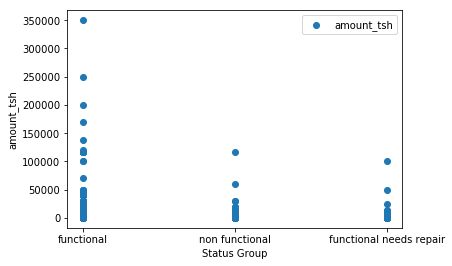

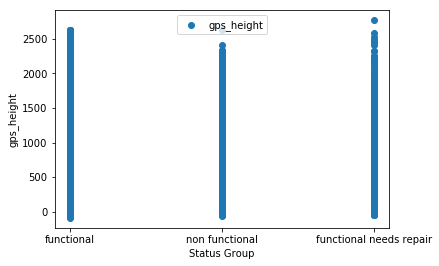

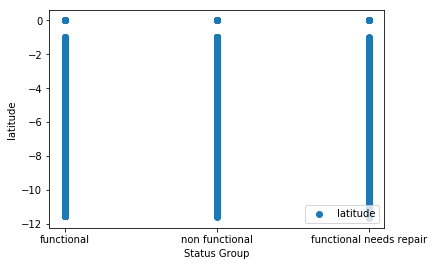

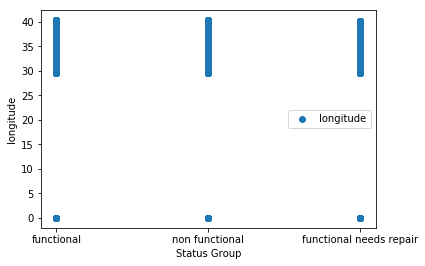

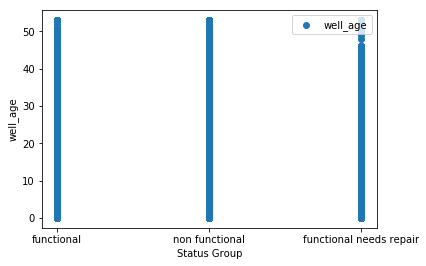

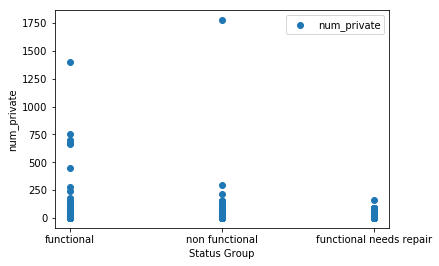

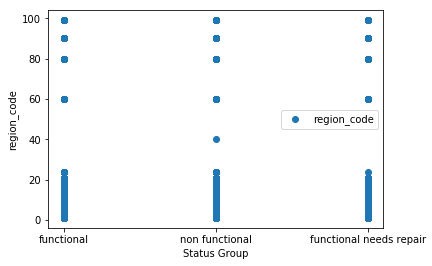

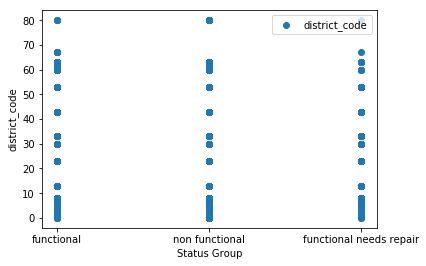

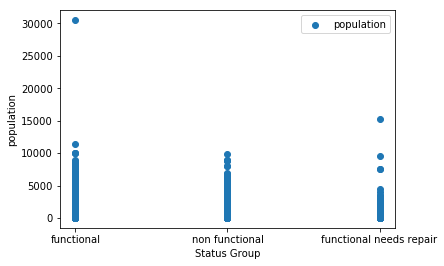

In [41]:
# Analyze distribution of continuous features among possible outcomes

for i, col in enumerate(cont_features.columns):
    plt.figure(i)
    plt.scatter(x = df['status_group'], y = cont_features[col])
    plt.ylabel(col)
    plt.xlabel('Status Group')
    plt.legend()

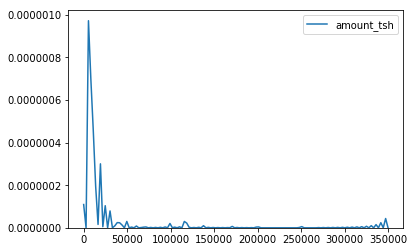

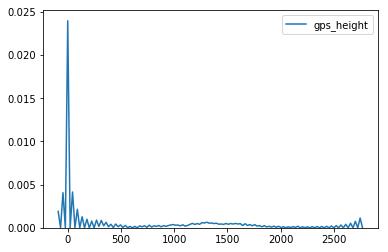

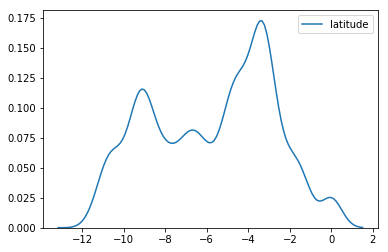

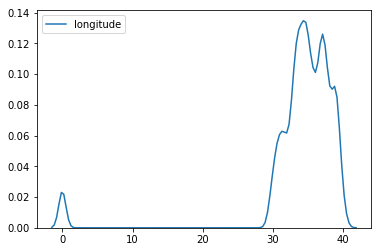

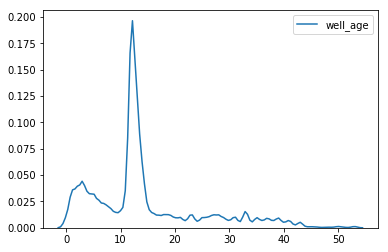

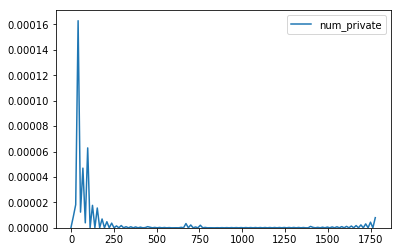

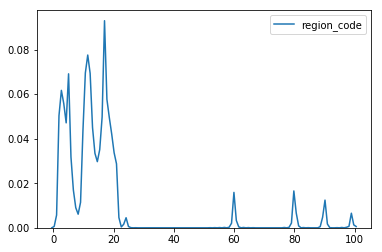

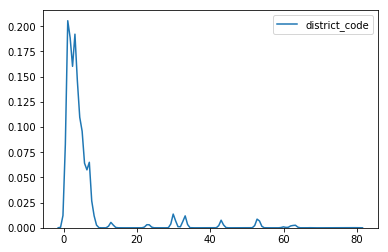

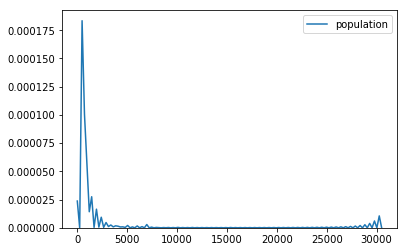

In [42]:
# Analyze distributions of continuous features

for i, col in enumerate(cont_features.columns):
    plt.figure(i)
    sns.kdeplot(cont_features[col], bw = 0.5)

In [43]:
# Amount_tsh, num_private, and population are very heavily zero inflated, they may need to be removed but I will 
# inspect them further first.

# The number of unique values in district_code and region_code needs to be inspected to determine if they may 
# function better as categorical variables 

### amount_tsh

0.00         0.700993
500.00       0.052222
50.00        0.041616
1000.00      0.025051
20.00        0.024630
200.00       0.020539
100.00       0.013737
10.00        0.013569
30.00        0.012508
2000.00      0.011852
250.00       0.009579
300.00       0.009377
5000.00      0.007576
5.00         0.006330
25.00        0.005993
3000.00      0.005623
1200.00      0.004495
1500.00      0.003316
6.00         0.003199
600.00       0.002963
4000.00      0.002626
2400.00      0.002441
2500.00      0.002340
6000.00      0.002104
7.00         0.001162
8000.00      0.001027
750.00       0.000993
40.00        0.000993
10000.00     0.000960
12000.00     0.000859
               ...   
16000.00     0.000034
16300.00     0.000034
800.00       0.000034
11000.00     0.000034
590.00       0.000034
520.00       0.000034
26000.00     0.000034
13000.00     0.000034
9.00         0.000017
170000.00    0.000017
200000.00    0.000017
900.00       0.000017
0.25         0.000017
53.00        0.000017
350000.00 

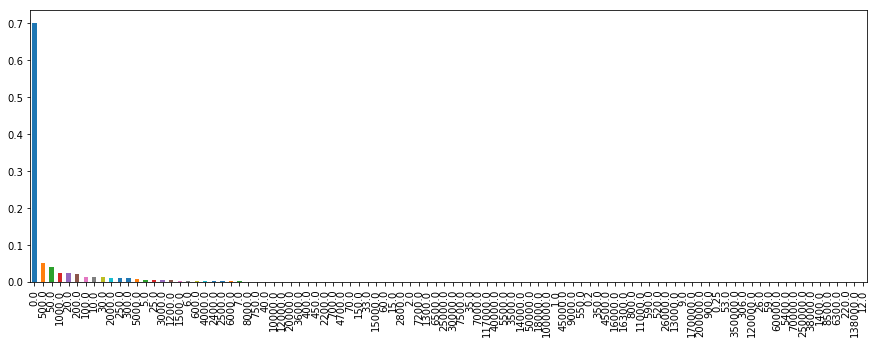

In [44]:
print(df['amount_tsh'].value_counts(normalize = True))
df['amount_tsh'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

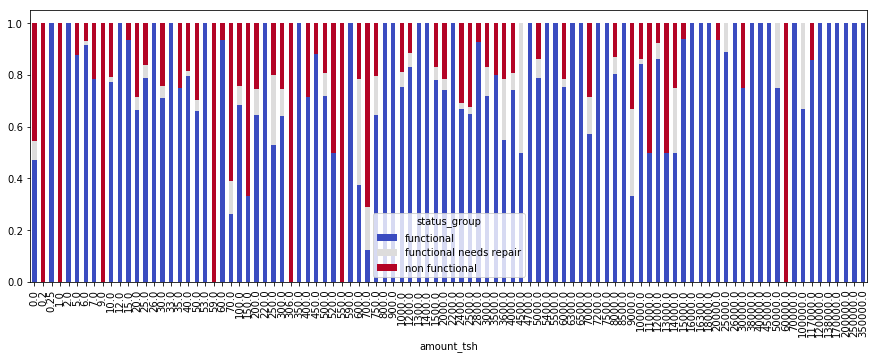

In [45]:
pd.crosstab(df['amount_tsh'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### num_private

0       0.987256
6       0.001364
1       0.001229
5       0.000774
8       0.000774
32      0.000673
45      0.000606
15      0.000589
39      0.000505
93      0.000471
3       0.000455
7       0.000438
2       0.000387
65      0.000370
47      0.000354
102     0.000337
4       0.000337
17      0.000286
80      0.000253
20      0.000236
25      0.000202
11      0.000185
41      0.000168
34      0.000168
16      0.000135
120     0.000118
150     0.000101
22      0.000101
12      0.000084
24      0.000084
          ...   
14      0.000051
61      0.000051
27      0.000034
26      0.000034
160     0.000017
30      0.000017
698     0.000017
60      0.000017
1402    0.000017
450     0.000017
668     0.000017
131     0.000017
35      0.000017
672     0.000017
42      0.000017
136     0.000017
87      0.000017
300     0.000017
280     0.000017
141     0.000017
62      0.000017
111     0.000017
240     0.000017
1776    0.000017
755     0.000017
180     0.000017
213     0.000017
23      0.0000

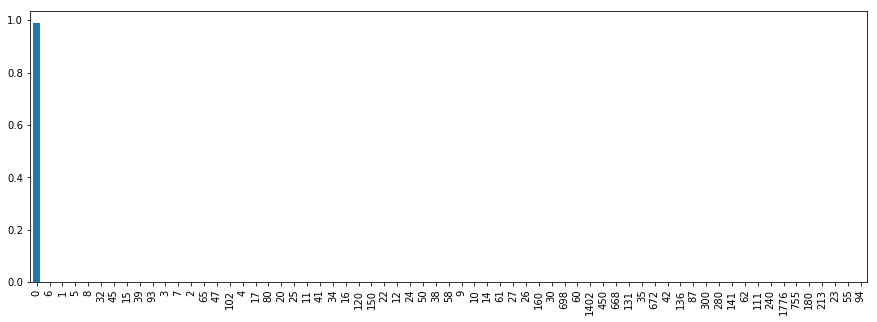

In [46]:
print(df['num_private'].value_counts(normalize = True))
df['num_private'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [28]:
# Num_private is almost 99% zeroes so it will be dropped 

df.drop(['num_private'], axis = 1, inplace = True)

### population

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
300     0.024848
100     0.019293
50      0.019175
500     0.016987
350     0.016599
120     0.015421
400     0.013047
60      0.011886
30      0.010539
40      0.009293
80      0.008973
450     0.008401
20      0.007778
600     0.007374
230     0.006532
75      0.004865
1000    0.004680
800     0.004529
90      0.004461
130     0.004444
25      0.004293
320     0.004192
35      0.004125
360     0.003737
140     0.003620
          ...   
8848    0.000017
628     0.000017
4520    0.000017
468     0.000017
693     0.000017
725     0.000017
789     0.000017
821     0.000017
5300    0.000017
3127    0.000017
2345    0.000017
3031    0.000017
886     0.000017
392     0.000017
424     0.000017
2807    0.000017
726     0.000017
694     0.000017
2569    0.000017
4788    0.000017
662     0.000017
4660    0.000017
406     0.000017
1032    0.000017
1160    0.000017
3241    0.000017
1960    0.000017
1685    0.0000

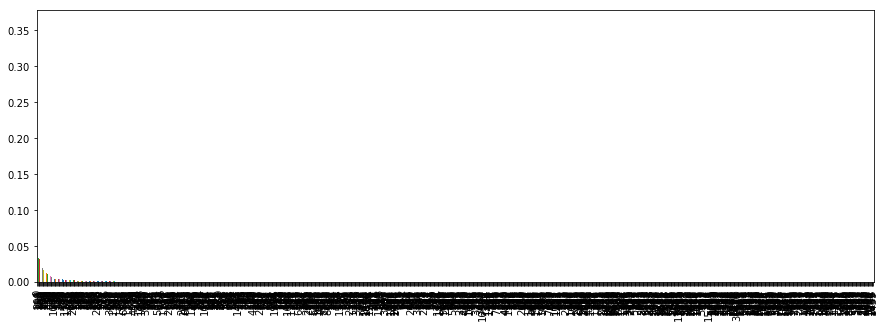

In [48]:
print(df['population'].value_counts(normalize = True))
df['population'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

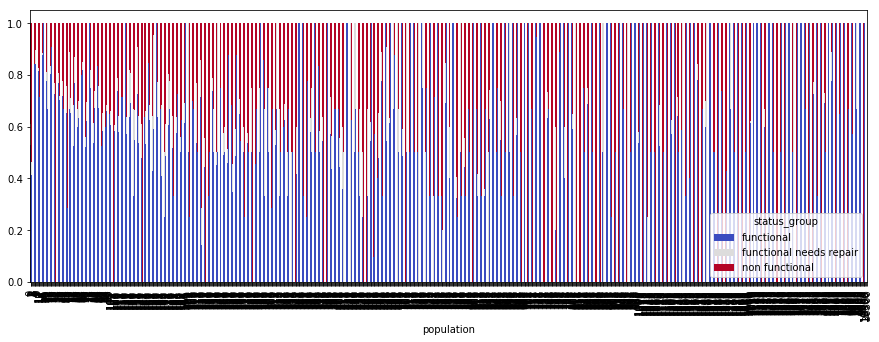

In [49]:
pd.crosstab(df['population'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

## Categorical Feature Examination

In [54]:
cat_features.head()

,funder,installer,wpt_name,basin,region,lga,ward,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Roman,Roman,none,Lake Nyasa,Iringa,Ludewa,Mundindi,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Grumeti,GRUMETI,Zahanati,Lake Victoria,Mara,Serengeti,Natta,GeoData Consultants Ltd,Other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Lottery Club,World vision,Kwa Mahundi,Pangani,Manyara,Simanjiro,Ngorika,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,GeoData Consultants Ltd,VWC,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Action In A,Artisan,Shuleni,Lake Victoria,Kagera,Karagwe,Nyakasimbi,GeoData Consultants Ltd,other,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### funder

Government Of Tanzania            0.152929
other                             0.061195
Danida                            0.052424
Hesawa                            0.037071
Rwssp                             0.023131
World Bank                        0.022710
Kkkt                              0.021667
World Vision                      0.020976
Unicef                            0.017795
Tasaf                             0.014764
District Council                  0.014192
Dhv                               0.013956
Private Individual                0.013906
Dwsp                              0.013653
0                                 0.013081
Norad                             0.012879
Germany Republi                   0.010269
Tcrs                              0.010135
Ministry Of Water                 0.009933
Water                             0.009815
Dwe                               0.008148
Netherlands                       0.007912
Hifab                             0.007576
Adb        

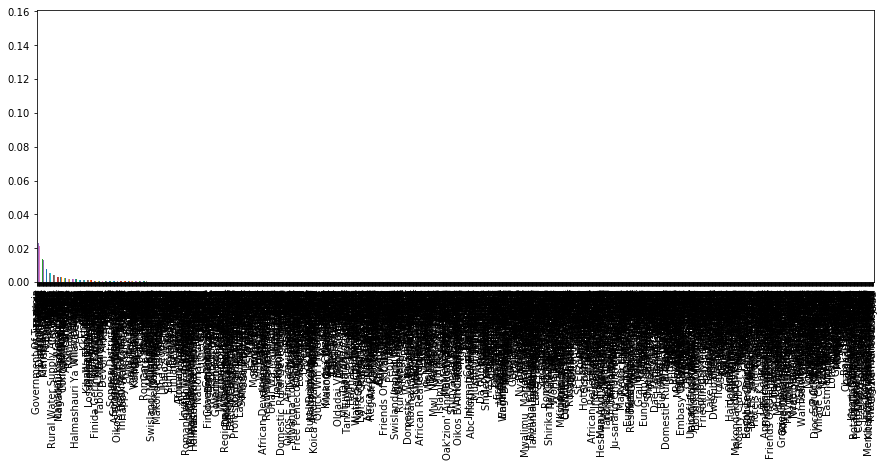

In [55]:
print(df['funder'].value_counts(normalize = True))
df['funder'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [29]:
# Limit funder categories to top 25, 50, or 100

def top_funders(var):
    if var in df['funder'].value_counts(normalize = True).head(50).index:
        return var
    else:
        return 'other'

In [30]:
df['top_funded'] = df['funder'].map(top_funders)

In [31]:
# Funder has almost 2,000 unique values so we are going to reduce that to the 50 most popular and also get rid 
# of the 0 entry.

df['top_funded'].replace('0', 'other', inplace = True)
df['top_funded'].replace('Finw', 'Fini Water', inplace = True)
df['top_funded'].replace('Germany Republi', 'Germany Republic', inplace = True)
df['top_funded'].replace('Private', 'Private Individual', inplace = True)
df['top_funded'].replace('Jica', 'Jaica', inplace = True)
df['top_funded'].replace('Water', 'Ministry Of Water', inplace = True)
df['top_funded'].replace('Ministry of Water', 'Ministry Of Water', inplace = True)

In [32]:
df['top_funded'].value_counts()

other                             22309
Government Of Tanzania             9084
Danida                             3114
Hesawa                             2202
Rwssp                              1374
World Bank                         1349
Kkkt                               1287
World Vision                       1246
Ministry Of Water                  1173
Private Individual                 1121
Unicef                             1057
Tasaf                               877
District Council                    843
Dhv                                 829
Dwsp                                811
Norad                               765
Fini Water                          612
Germany Republic                    610
Tcrs                                602
Jaica                               539
Dwe                                 484
Netherlands                         470
Hifab                               450
Adb                                 448
Lga                                 442


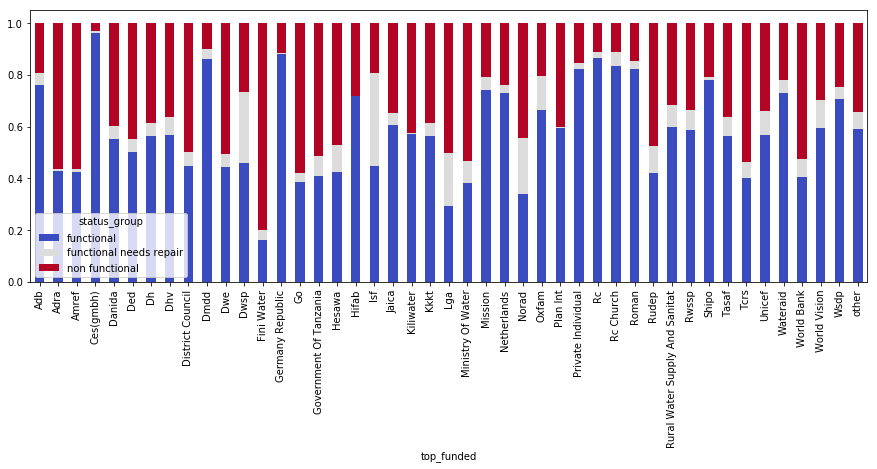

In [33]:
pd.crosstab(df['top_funded'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### installer

DWE                        0.292963
other                      0.061532
Government                 0.030724
RWE                        0.020303
Commu                      0.017845
DANIDA                     0.017677
KKKT                       0.015118
Hesawa                     0.014141
0                          0.013081
TCRS                       0.011902
Central government         0.010471
CES                        0.010269
Community                  0.009310
DANID                      0.009293
District Council           0.009276
HESAWA                     0.009074
LGA                        0.006869
World vision               0.006869
WEDECO                     0.006684
TASAF                      0.006667
District council           0.006599
Gover                      0.006448
AMREF                      0.005539
TWESA                      0.005320
WU                         0.005067
Dmdd                       0.004832
ACRA                       0.004680
World Vision               0

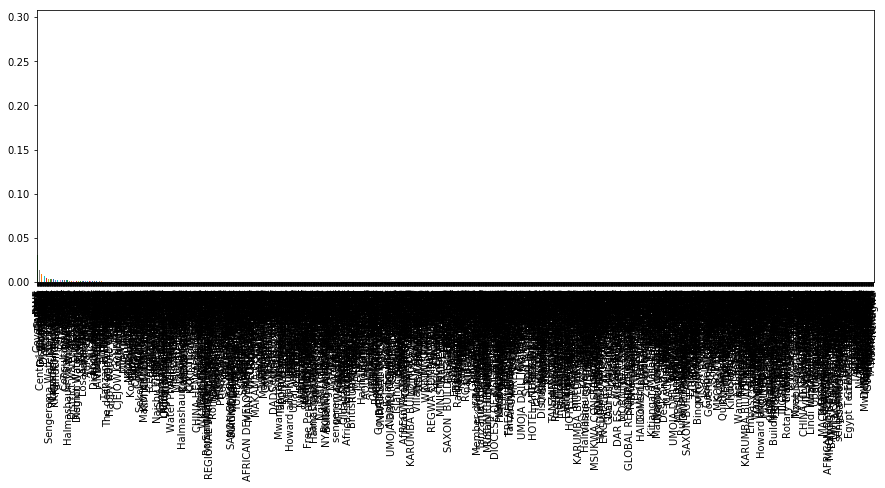

In [60]:
print(df['installer'].value_counts(normalize = True))
df['installer'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [34]:
# Limit installer categories to top 25, 50, or 100

def top_installer(var):
    if var in df['installer'].value_counts(normalize = True).head(50).index:
        return var
    else:
        return 'other'

In [35]:
df['top_installers'] = df['installer'].map(top_installer)

In [36]:
# Correct data entry grammatical errors

df['top_installers'].replace('0', 'other', inplace = True)
df['top_installers'].replace('District council', 'District Council', inplace = True)
df['top_installers'].replace('Gover', 'Government', inplace = True)
df['top_installers'].replace('Commu', 'Community', inplace = True)
df['top_installers'].replace('World vision', 'World Vision', inplace = True)
df['top_installers'].replace('HESAWA', 'Hesawa', inplace = True)
df['top_installers'].replace('DANID', 'DANIDA', inplace = True)
df['top_installers'].replace('Centr', 'Central government', inplace = True)
df['top_installers'].replace('Gove', 'Government', inplace = True)
df['top_installers'].replace('Distri', 'District Council', inplace = True)
df['top_installers'].replace('KKKT _ Konde and DWE', 'KKKT', inplace = True)
df['top_installers'].replace('Da', 'DANIDA', inplace = True)
df['top_installers'].replace('Magadini-Makiwaru wa', 'Magadini-Makiwaru Water Supply', inplace = True)
df['top_installers'].replace('Lawatefuka water sup', 'Lawatefuka Water Supply', inplace = True)

In [37]:
# Inspect value counts

df['top_installers'].value_counts()

other                             22399
DWE                               17402
Government                         2430
DANIDA                             1826
Community                          1613
Hesawa                             1379
RWE                                1206
District Council                   1124
KKKT                               1064
Central government                  784
TCRS                                707
World Vision                        678
CES                                 610
LGA                                 408
WEDECO                              397
TASAF                               396
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287
ACRA                                278
SEMA                                249
DW                                  246
OXFAM                               234
UNICEF                              222


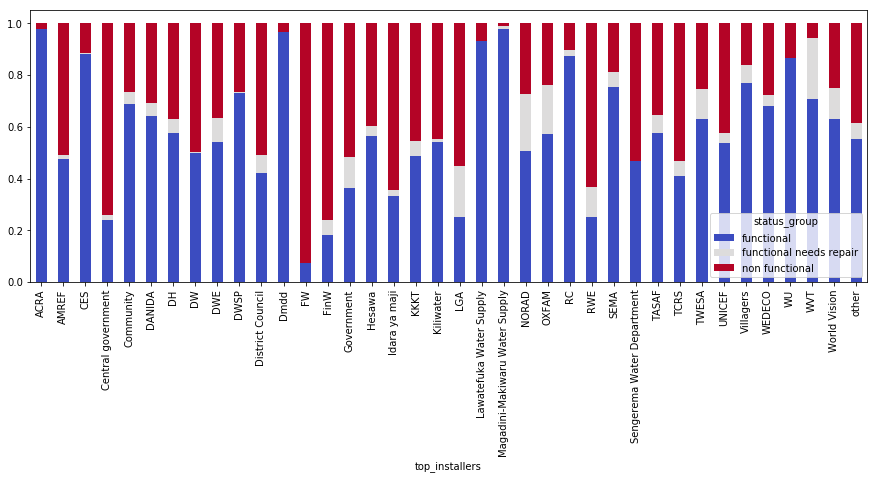

In [38]:
pd.crosstab(df['top_installers'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### wpt_name

none                         0.059983
Shuleni                      0.029428
Zahanati                     0.013973
Msikitini                    0.009007
Kanisani                     0.005438
Bombani                      0.004562
Sokoni                       0.004377
Ofisini                      0.004276
School                       0.003502
Shule Ya Msingi              0.003350
Shule                        0.002559
Sekondari                    0.002458
Muungano                     0.002239
Mkombozi                     0.001869
Madukani                     0.001751
Hospital                     0.001582
Mbugani                      0.001582
Upendo                       0.001566
Kituo Cha Afya               0.001515
Mkuyuni                      0.001481
Umoja                        0.001414
Center                       0.001397
Ccm                          0.001364
Kisimani                     0.001313
Ofisi Ya Kijiji              0.001279
Mtakuja                      0.001279
Tankini     

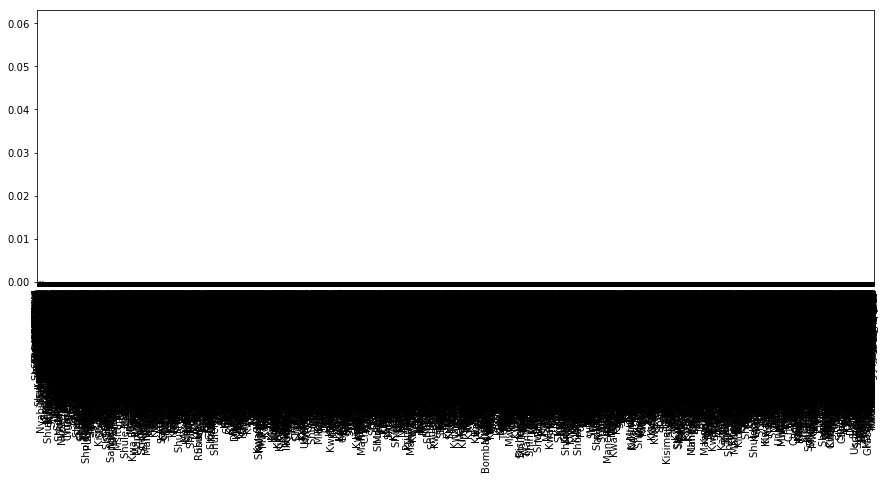

In [119]:
print(df['wpt_name'].value_counts(normalize = True))
df['wpt_name'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [39]:
# Limit wpt_name categories to top 25, 50, or 100

def top_wpt_names(var):
    if var in df['wpt_name'].value_counts(normalize = True).head(25).index:
        return var
    else:
        return 'other'

In [40]:
df['top_wpt_name'] = df['wpt_name'].map(top_wpt_names)

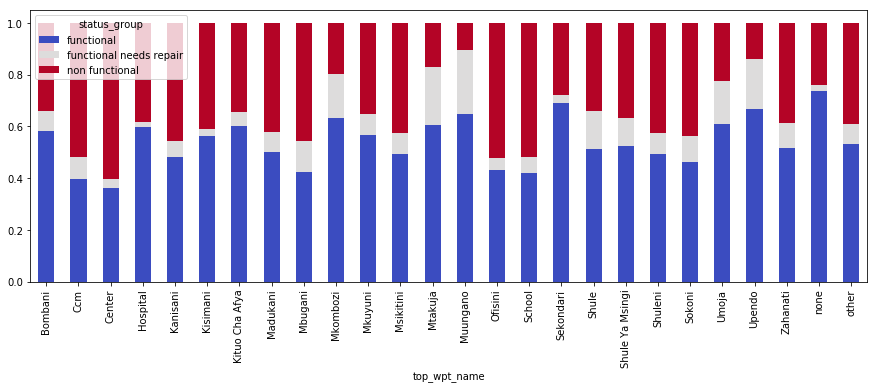

In [41]:
pd.crosstab(df['top_wpt_name'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [40]:
# Over half of the values for wpt_name are unique so this column will be deleted

#df.drop(['wpt_name'], axis = 1, inplace = True)

### basin

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                     0.134276
Internal                   0.131061
Lake Tanganyika            0.108283
Wami / Ruvu                0.100791
Lake Nyasa                 0.085606
Ruvuma / Southern Coast    0.075640
Lake Rukwa                 0.041313
Name: basin, dtype: float64


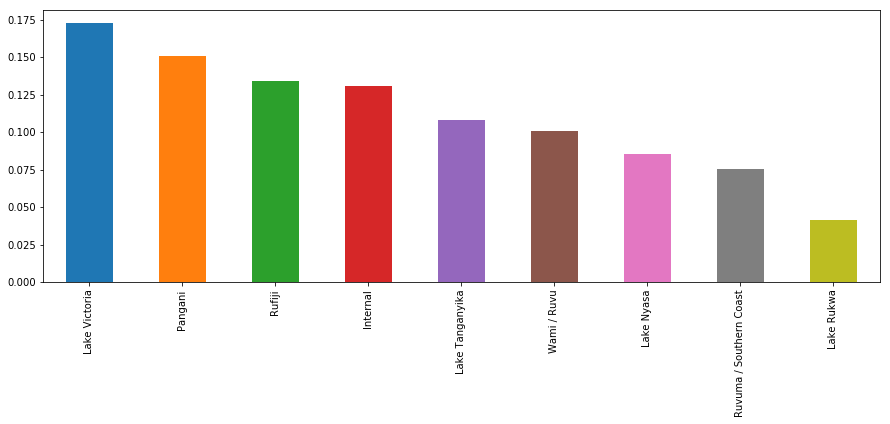

In [121]:
print(df['basin'].value_counts(normalize = True))
df['basin'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

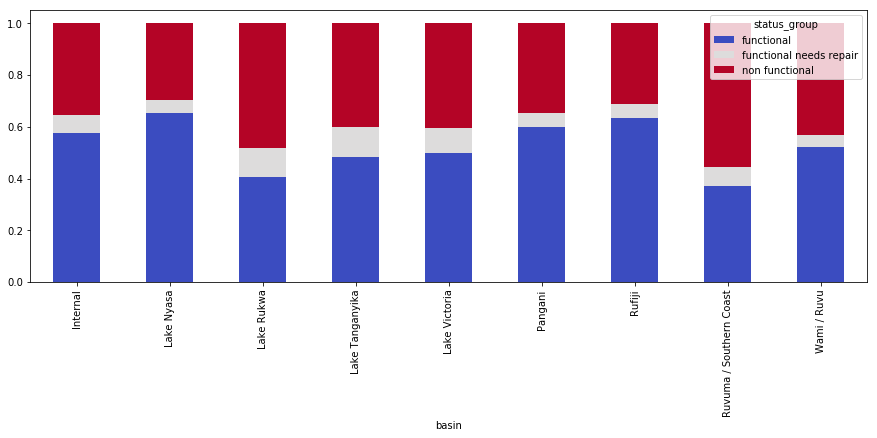

In [122]:
pd.crosstab(df['basin'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### subvillage

Madukani       0.008552
Shuleni        0.008519
Majengo        0.008451
Kati           0.006279
other          0.006246
Mtakuja        0.004411
Sokoni         0.003906
M              0.003148
Muungano       0.002896
Mbuyuni        0.002761
Mlimani        0.002559
Songambele     0.002475
Miembeni       0.002256
Msikitini      0.002256
1              0.002222
Kibaoni        0.001919
Kanisani       0.001869
I              0.001835
Mapinduzi      0.001835
Mjimwema       0.001818
Mjini          0.001818
Mkwajuni       0.001751
Mwenge         0.001717
Mabatini       0.001650
Azimio         0.001650
Mission        0.001599
Mbugani        0.001599
Bwawani        0.001532
Bondeni        0.001515
Chang'Ombe     0.001481
                 ...   
Nandinga       0.000017
Barabara 3B    0.000017
Mwadanga       0.000017
Zezengwalo     0.000017
Mrocha         0.000017
Vuli           0.000017
Kigane         0.000017
Ndurumo        0.000017
Mfine          0.000017
Kwalunguza     0.000017
Mungori        0

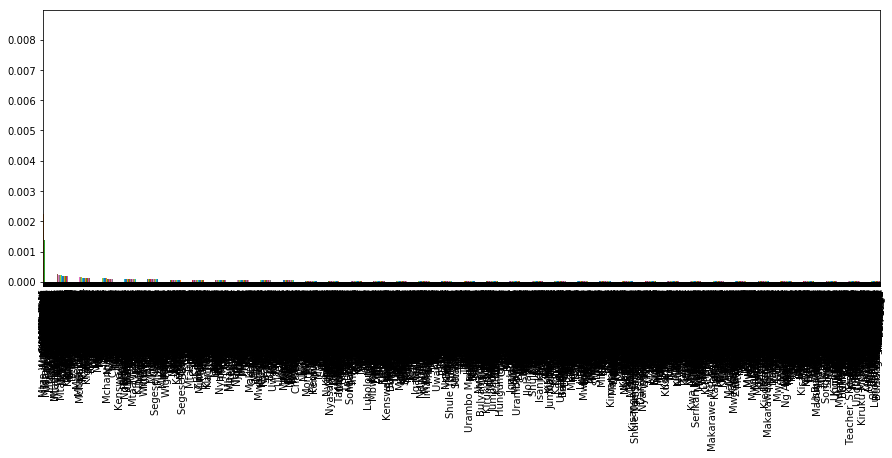

In [56]:
print(df['subvillage'].value_counts(normalize = True))
df['subvillage'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [57]:
# Limit wpt_name categories to top 25, 50, or 100

def top_subvillages(var):
    if var in df['subvillage'].value_counts(normalize = True).head(25).index:
        return var
    else:
        return 'other'

In [58]:
df['top_subvillage'] = df['subvillage'].map(top_subvillages)

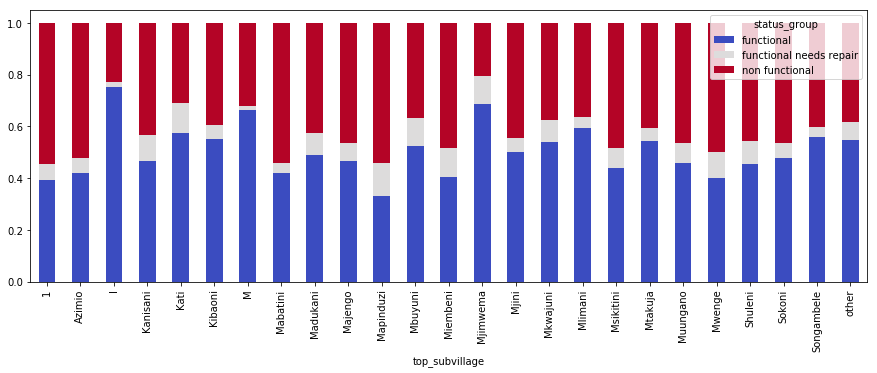

In [59]:
pd.crosstab(df['top_subvillage'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### region

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64


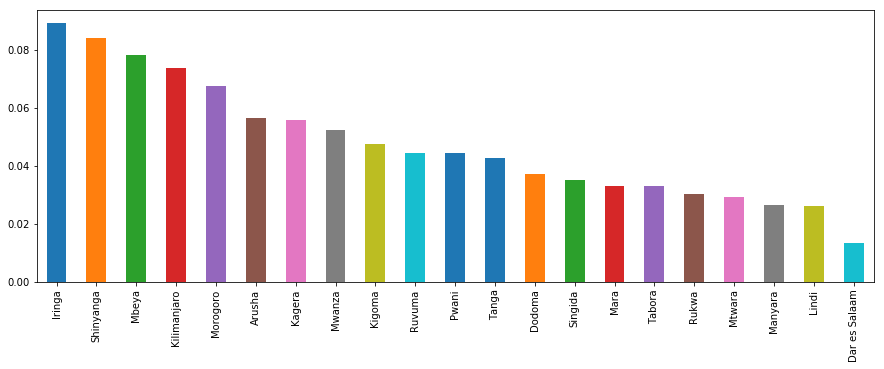

In [124]:
print(df['region'].value_counts(normalize = True))
df['region'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

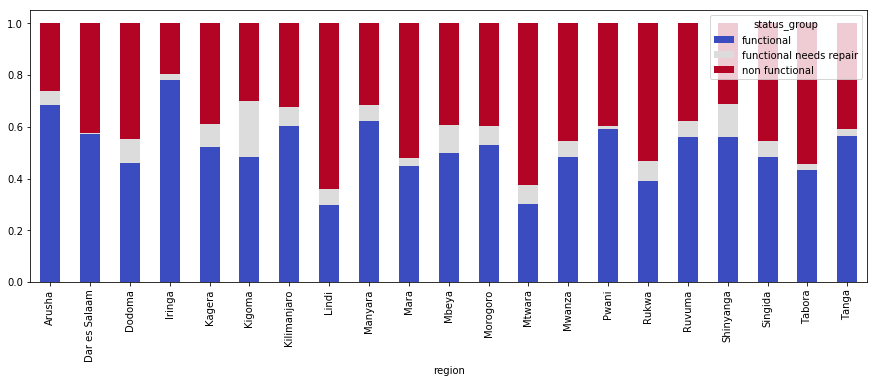

In [125]:
pd.crosstab(df['region'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### region_code

11    0.089226
17    0.084360
12    0.078098
3     0.073721
5     0.068013
18    0.055960
19    0.051296
2     0.050909
16    0.047407
10    0.044444
4     0.042306
1     0.037054
13    0.035236
14    0.033316
20    0.033148
15    0.030438
6     0.027088
21    0.026650
80    0.020842
60    0.017256
90    0.015438
7     0.013552
99    0.007121
9     0.006566
24    0.005488
8     0.005051
40    0.000017
Name: region_code, dtype: float64


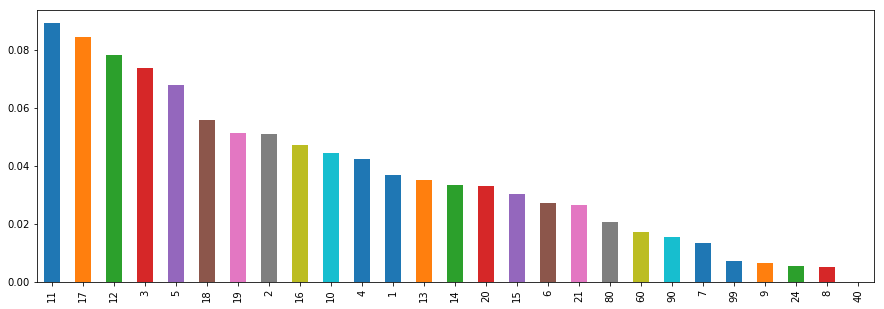

In [126]:
print(df['region_code'].value_counts(normalize = True))
df['region_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

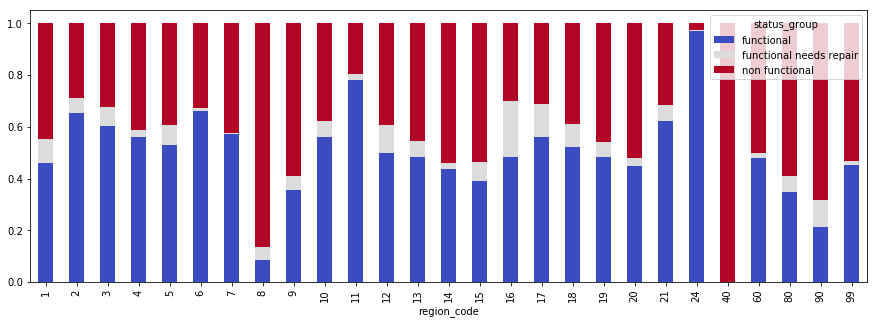

In [127]:
pd.crosstab(df['region_code'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### district_code

1     0.205438
2     0.188098
3     0.168316
4     0.151498
5     0.073333
6     0.068586
7     0.056279
8     0.017559
30    0.016751
33    0.014714
53    0.012542
43    0.008502
13    0.006582
23    0.004933
63    0.003283
62    0.001835
60    0.001061
0     0.000387
80    0.000202
67    0.000101
Name: district_code, dtype: float64


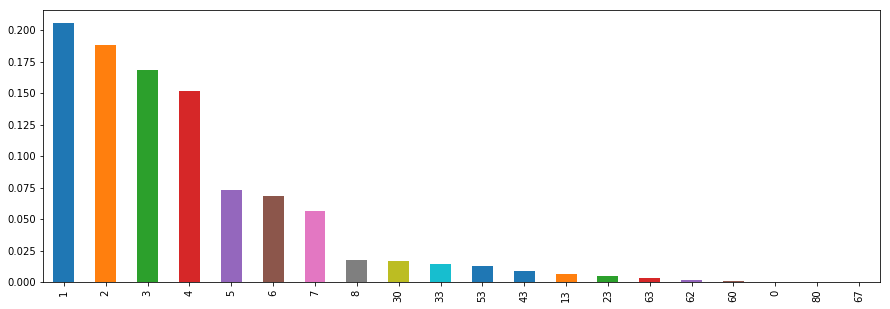

In [130]:
print(df['district_code'].value_counts(normalize = True))
df['district_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

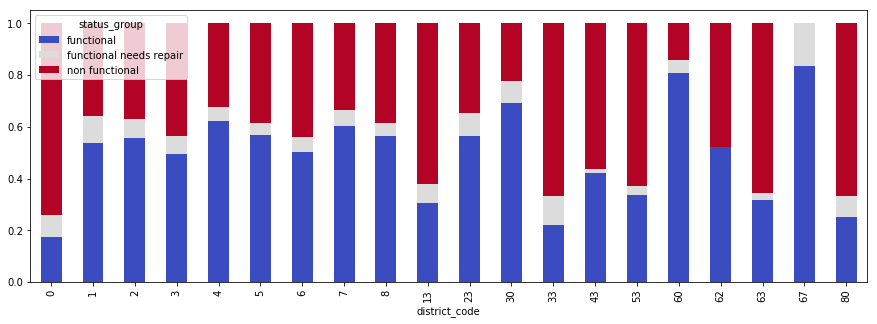

In [128]:
pd.crosstab(df['district_code'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### lga

Njombe              0.042138
Arusha Rural        0.021077
Moshi Rural         0.021061
Bariadi             0.019815
Rungwe              0.018620
Kilosa              0.018418
Kasulu              0.017626
Mbozi               0.017407
Meru                0.016987
Bagamoyo            0.016785
Singida Rural       0.016751
Kilombero           0.016145
Same                0.014764
Kibondo             0.014714
Kyela               0.014461
Kahama              0.014074
Magu                0.013872
Kigoma Rural        0.013872
Maswa               0.013620
Karagwe             0.012980
Mbinga              0.012626
Iringa Rural        0.012256
Serengeti           0.012054
Lushoto             0.011684
Namtumbo            0.011684
Songea Rural        0.011667
Mpanda              0.011431
Mvomero             0.011296
Ngara               0.011263
Ulanga              0.011195
                      ...   
Newala              0.003889
Bahi                0.003771
Kisarawe            0.003754
Temeke        

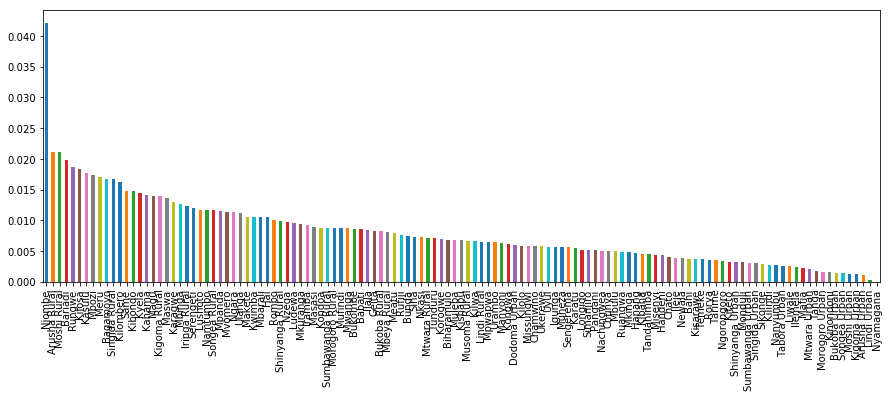

In [131]:
print(df['lga'].value_counts(normalize = True))
df['lga'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

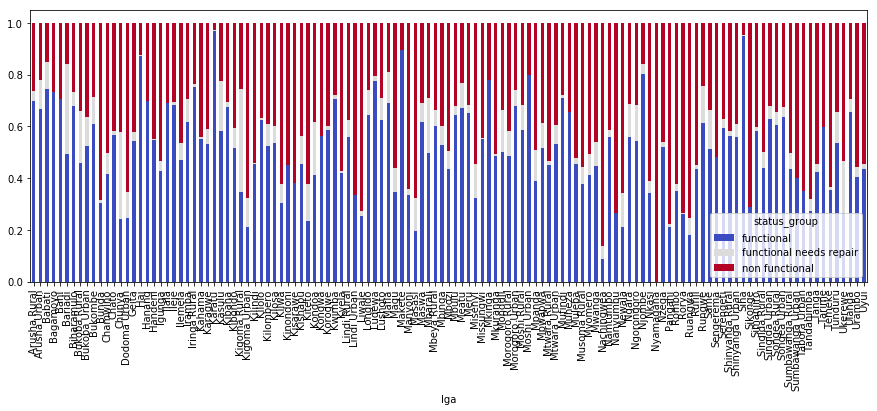

In [132]:
pd.crosstab(df['lga'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### ward

Igosi               0.005168
Imalinyi            0.004242
Siha Kati           0.003906
Mdandu              0.003889
Nduruma             0.003653
Kitunda             0.003418
Mishamo             0.003418
Msindo              0.003384
Chalinze            0.003300
Maji ya Chai        0.003199
Usuka               0.003148
Ngarenanyuki        0.002896
Chanika             0.002879
Vikindu             0.002727
Mtwango             0.002576
Matola              0.002441
Zinga/Ikerege       0.002374
Wanging'ombe        0.002340
Maramba             0.002340
Itete               0.002306
Magomeni            0.002273
Kikatiti            0.002256
Ifakara             0.002256
Olkokola            0.002239
Maposeni            0.002189
Igongolo            0.002172
Mvomero             0.002172
Mlangali            0.002104
Nkoma               0.002054
Nkungulu            0.002037
                      ...   
Mawenzi             0.000017
Kinungu             0.000017
Burungura           0.000017
Nsemulwa      

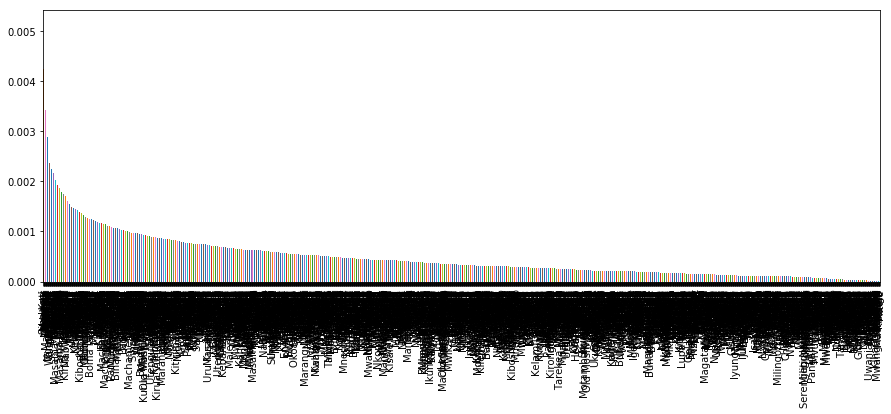

In [133]:
print(df['ward'].value_counts(normalize = True))
df['ward'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [42]:
# Limit 'ward' categories to top 25, 50, or 100

def top_wards(var):
    if var in df['ward'].value_counts(normalize = True).head(25).index:
        return var
    else:
        return 'other'

In [43]:
df['top_ward'] = df['ward'].map(top_wards)

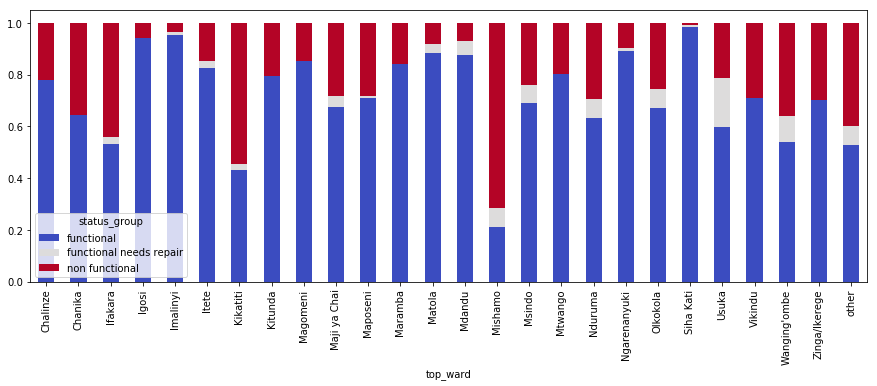

In [44]:
pd.crosstab(df['top_ward'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [41]:
# Ward has over 2,000 entries with each comprising a miniscule representation of the data. It will be deleted to 
# reduce dimensionality.

#df.drop(['ward'], axis = 1, inplace = True)

### recorded_by

GeoData Consultants Ltd    1.0
Name: recorded_by, dtype: float64


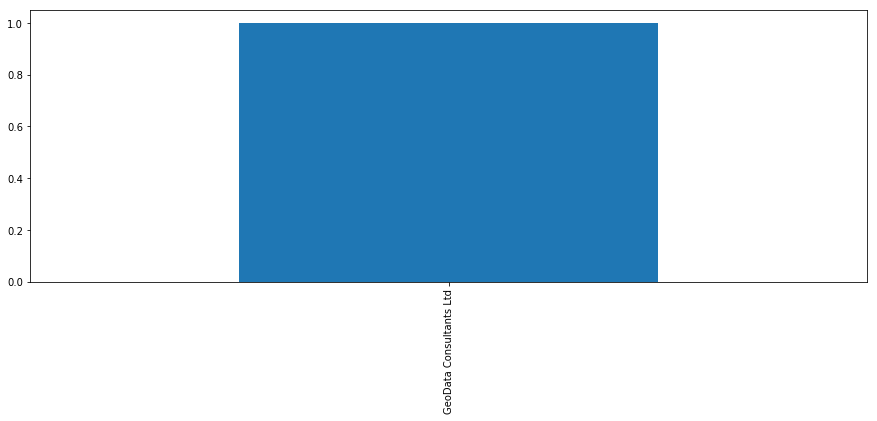

In [135]:
print(df['recorded_by'].value_counts(normalize = True))
df['recorded_by'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [45]:
# Recorded_by is accounted for by one company and isnt useful for modeling so it will be dropped.

df.drop(['recorded_by'], axis = 1, inplace = True)

### public_meeting

True     0.858771
False    0.085101
other    0.056128
Name: public_meeting, dtype: float64


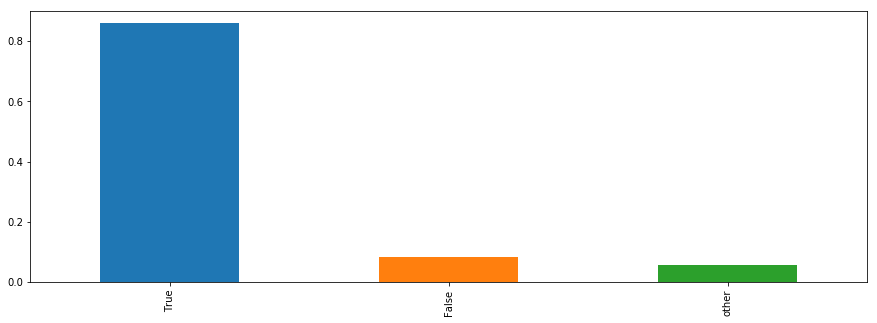

In [68]:
print(df['public_meeting'].value_counts(normalize = True))
df['public_meeting'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

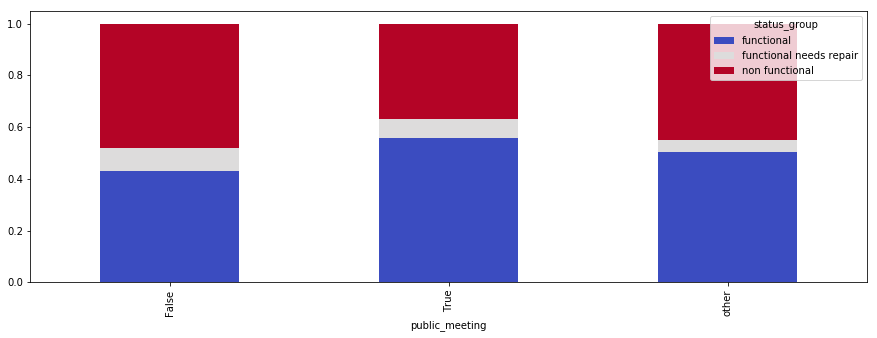

In [69]:
pd.crosstab(df['public_meeting'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### scheme_name

other                                       0.474175
K                                           0.011481
None                                        0.010842
Borehole                                    0.009192
Chalinze wate                               0.006818
M                                           0.006734
DANIDA                                      0.006380
Government                                  0.005387
Ngana water supplied scheme                 0.004545
wanging'ombe water supply s                 0.004394
wanging'ombe supply scheme                  0.003939
Bagamoyo wate                               0.003855
I                                           0.003855
Uroki-Bomang'ombe water sup                 0.003519
N                                           0.003434
Kirua kahe gravity water supply trust       0.003249
Machumba estate pipe line                   0.003114
Makwale water supplied sche                 0.002795
Kijiji                                      0.

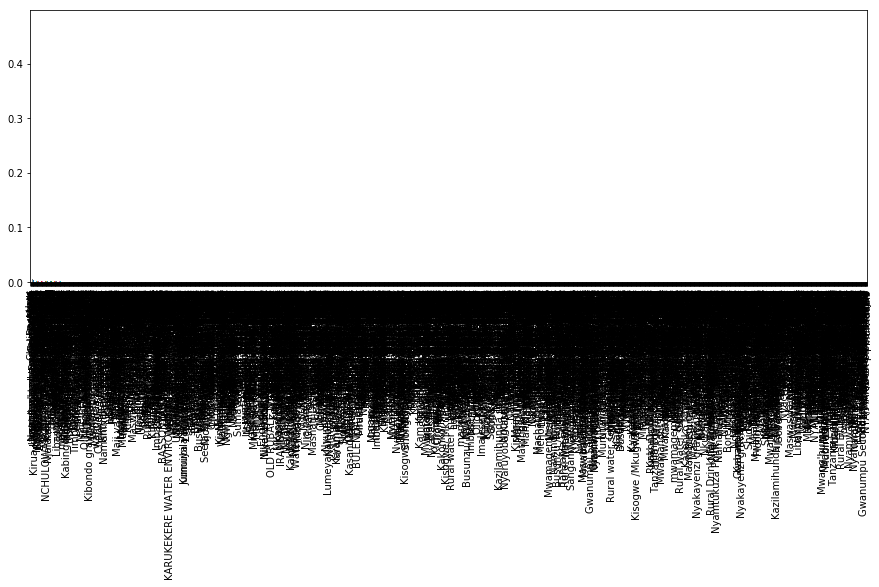

In [62]:
print(df['scheme_name'].value_counts(normalize = True))
df['scheme_name'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [63]:
# Limit 'scheme_name' categories to top 25, 50, or 100

def top_scheme_names(var):
    if var in df['scheme_name'].value_counts(normalize = True).head(50).index:
        return var
    else:
        return 'other'

In [64]:
df['top_scheme_name'] = df['scheme_name'].map(top_scheme_names)

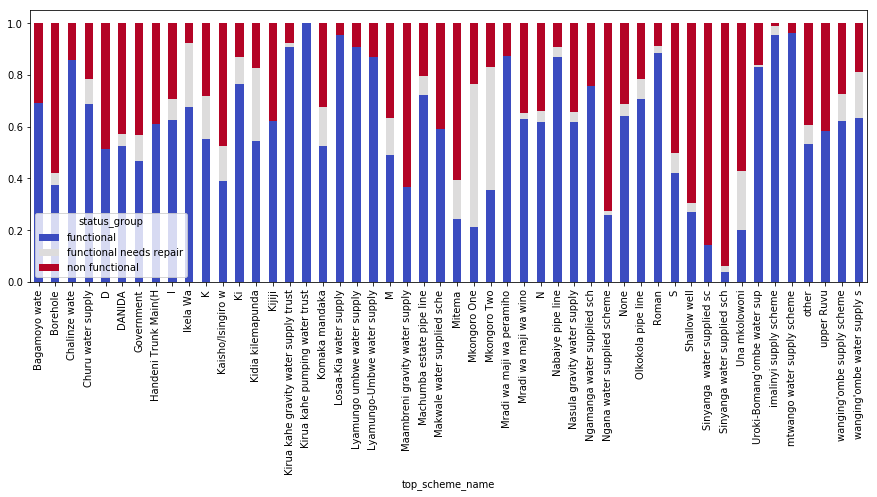

In [65]:
pd.crosstab(df['top_scheme_name'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### scheme_management

VWC                 0.619411
WUG                 0.087643
other               0.065269
Water authority     0.053081
WUA                 0.048535
Water Board         0.046263
Parastatal          0.028283
Private operator    0.017896
Company             0.017862
Other               0.012896
SWC                 0.001633
Trust               0.001212
None                0.000017
Name: scheme_management, dtype: float64


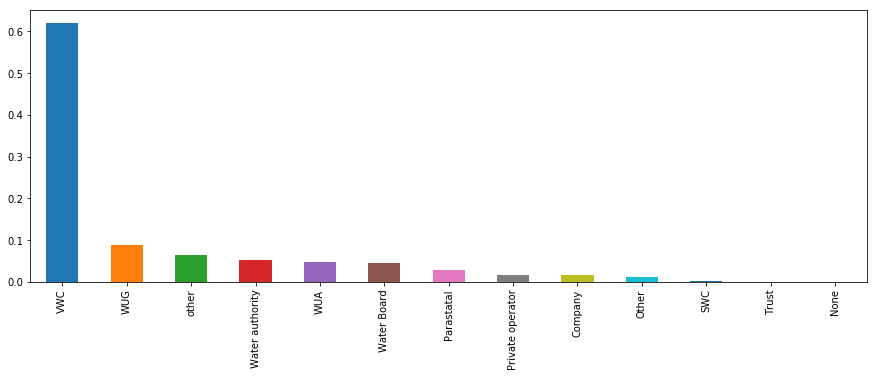

In [138]:
print(df['scheme_management'].value_counts(normalize = True))
df['scheme_management'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

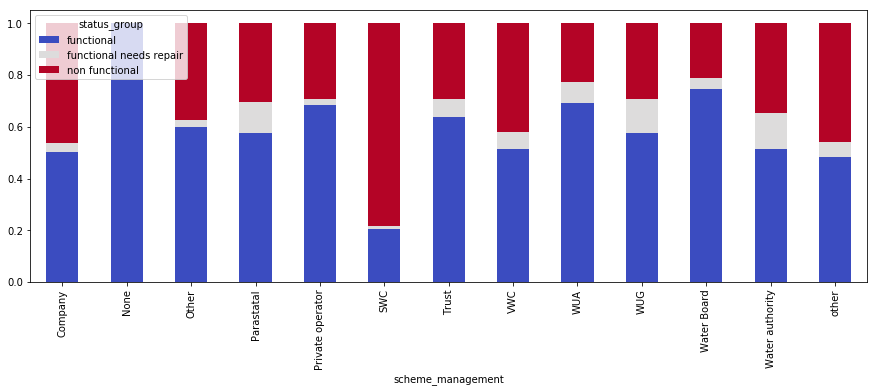

In [139]:
pd.crosstab(df['scheme_management'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### permit

True     0.654074
False    0.294478
other    0.051448
Name: permit, dtype: float64


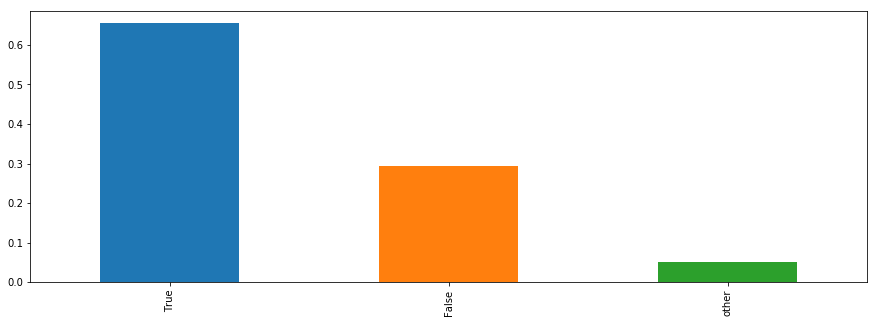

In [141]:
print(df['permit'].value_counts(normalize = True))
df['permit'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

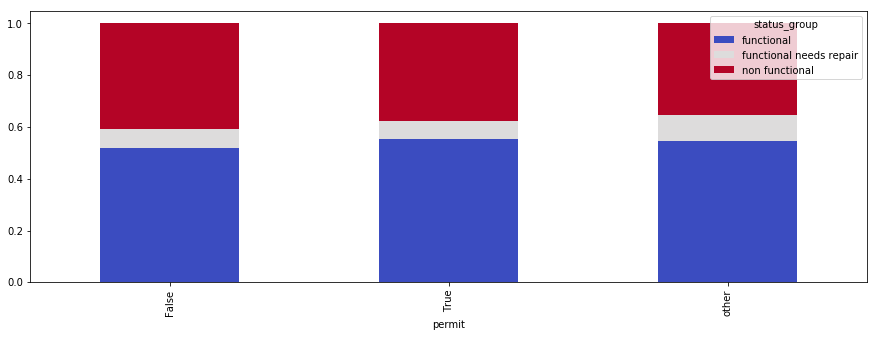

In [140]:
pd.crosstab(df['permit'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [46]:
# Permit is equally distributed among outcomes so it will be removed to reduce modeling noise. 

df.drop(['permit'], axis = 1, inplace = True)

### extraction_type

gravity                      0.450842
nira/tanira                  0.137273
other                        0.108249
submersible                  0.080202
swn 80                       0.061785
mono                         0.048232
india mark ii                0.040404
afridev                      0.029798
ksb                          0.023822
other - rope pump            0.007593
other - swn 81               0.003855
windmill                     0.001970
india mark iii               0.001650
cemo                         0.001515
other - play pump            0.001431
walimi                       0.000808
climax                       0.000539
other - mkulima/shinyanga    0.000034
Name: extraction_type, dtype: float64


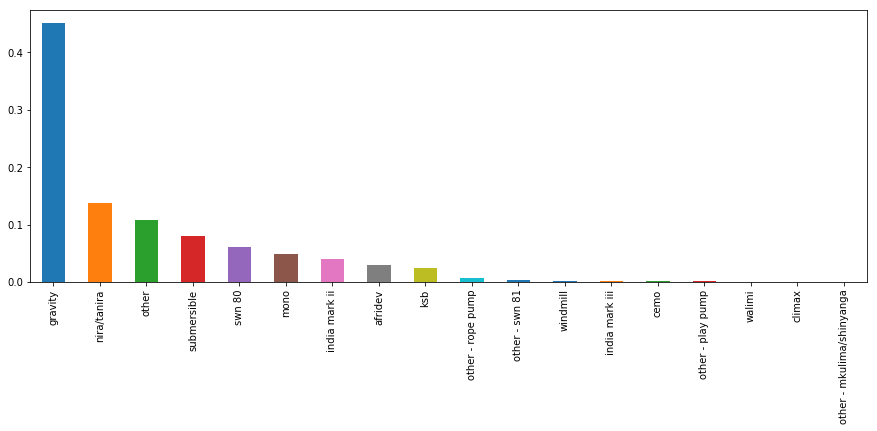

In [143]:
print(df['extraction_type'].value_counts(normalize = True))
df['extraction_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

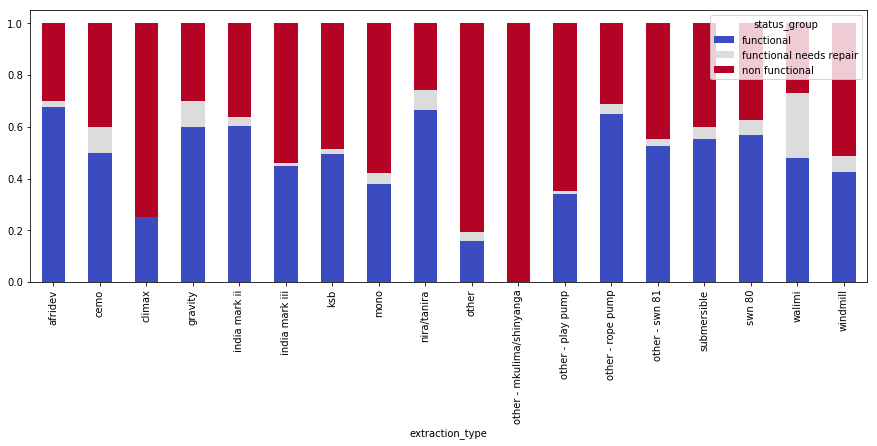

In [144]:
pd.crosstab(df['extraction_type'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### extraction_type_group

gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      0.040404
afridev            0.029798
rope pump          0.007593
other handpump     0.006128
other motorpump    0.002054
wind-powered       0.001970
india mark iii     0.001650
Name: extraction_type_group, dtype: float64


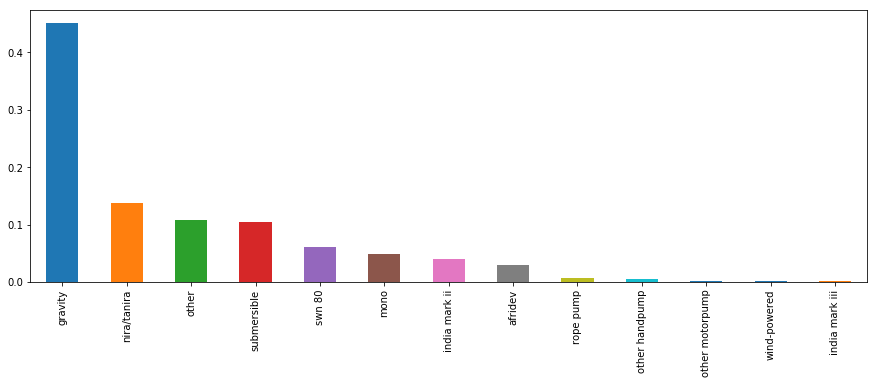

In [147]:
print(df['extraction_type_group'].value_counts(normalize = True))
df['extraction_type_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

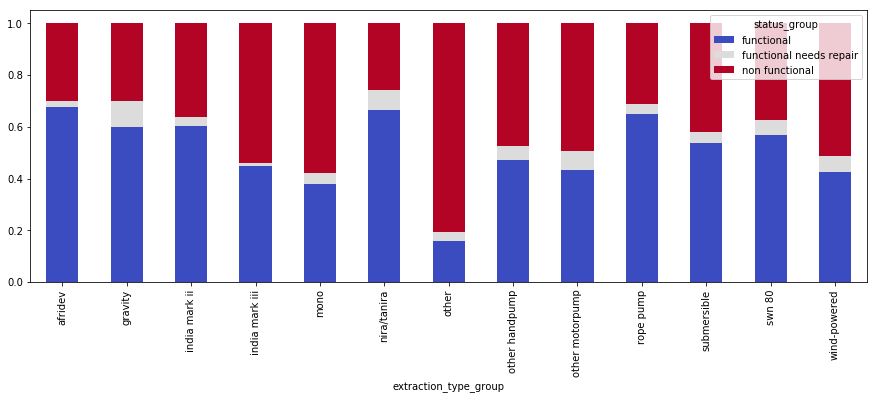

In [145]:
pd.crosstab(df['extraction_type_group'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### extraction_type_class

gravity         0.450842
handpump        0.277037
other           0.108249
submersible     0.104024
motorpump       0.050286
rope pump       0.007593
wind-powered    0.001970
Name: extraction_type_class, dtype: float64


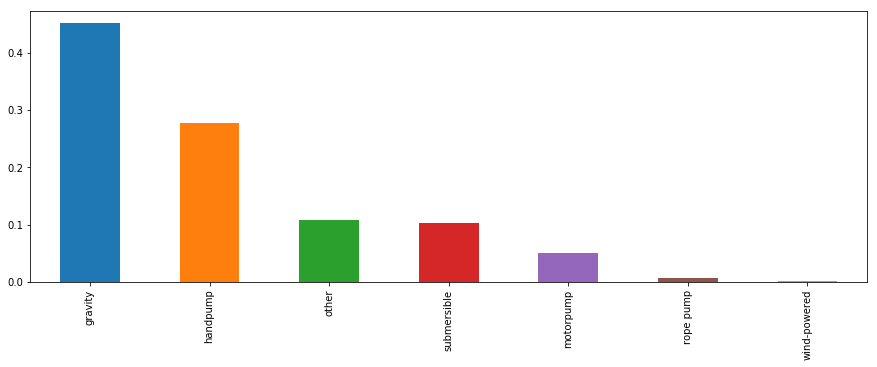

In [148]:
print(df['extraction_type_class'].value_counts(normalize = True))
df['extraction_type_class'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

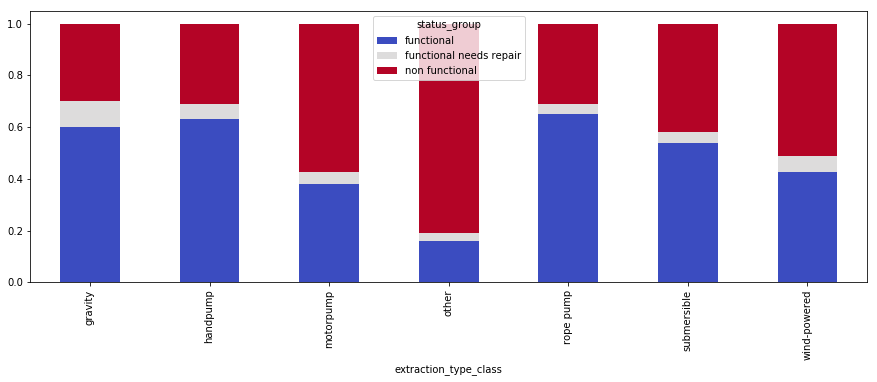

In [149]:
pd.crosstab(df['extraction_type_class'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [47]:
# Extraction type, group, and class are all providing similar information and class will contribute least to
# model dimensionality so it will be retained and type and group will be removed.

df.drop(columns = ['extraction_type', 'extraction_type_group'], axis = 1, inplace = True)

### management

vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64


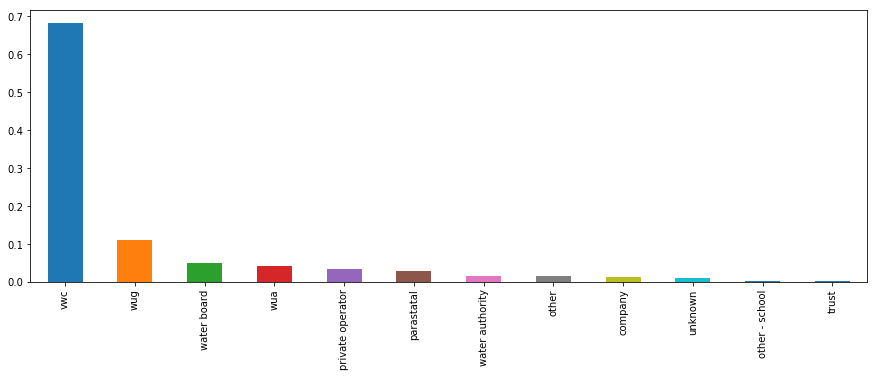

In [152]:
print(df['management'].value_counts(normalize = True))
df['management'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

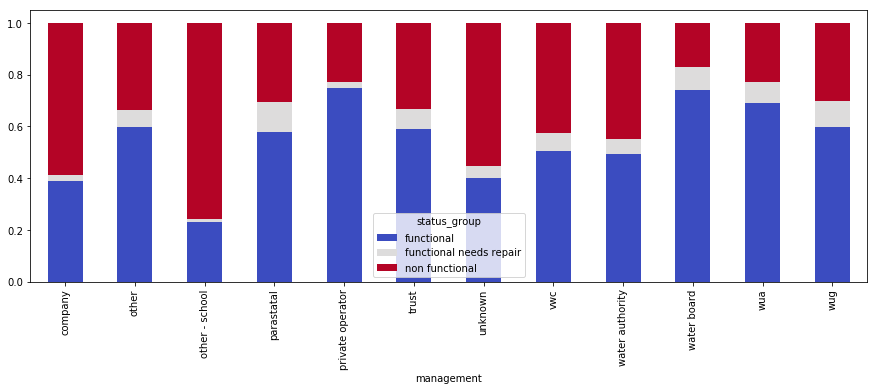

In [151]:
pd.crosstab(df['management'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### management_group

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64


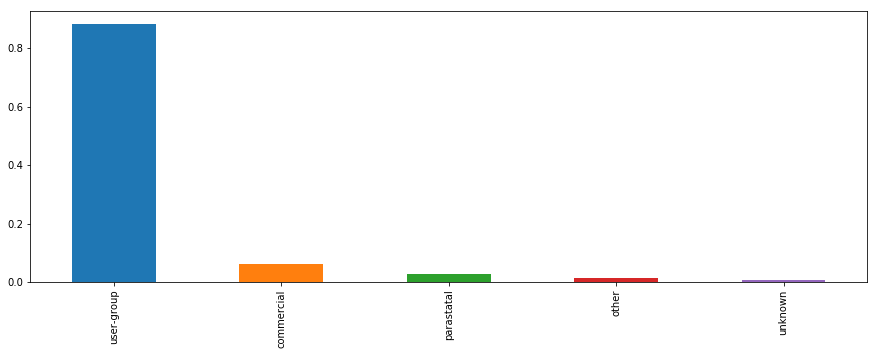

In [153]:
print(df['management_group'].value_counts(normalize = True))
df['management_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [48]:
# Management and management_group contain the same information but management has more variance in the data so it 
# will be retained and management_group will be removed.

df.drop(['management_group'], axis = 1, inplace = True)

### payment

never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: payment, dtype: float64


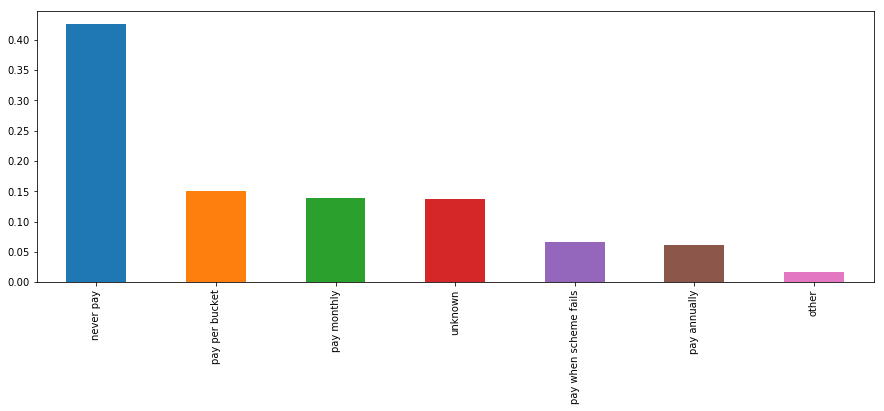

In [155]:
print(df['payment'].value_counts(normalize = True))
df['payment'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

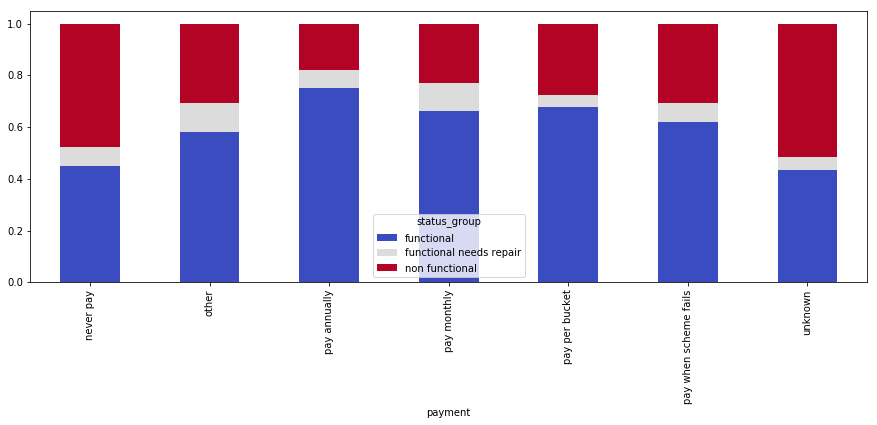

In [156]:
pd.crosstab(df['payment'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### payment_type

never pay     0.426734
per bucket    0.151263
monthly       0.139731
unknown       0.137323
on failure    0.065892
annually      0.061313
other         0.017744
Name: payment_type, dtype: float64


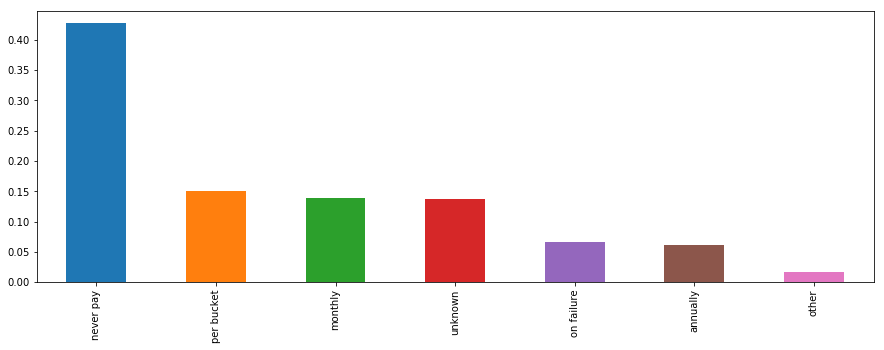

In [158]:
print(df['payment_type'].value_counts(normalize = True))
df['payment_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

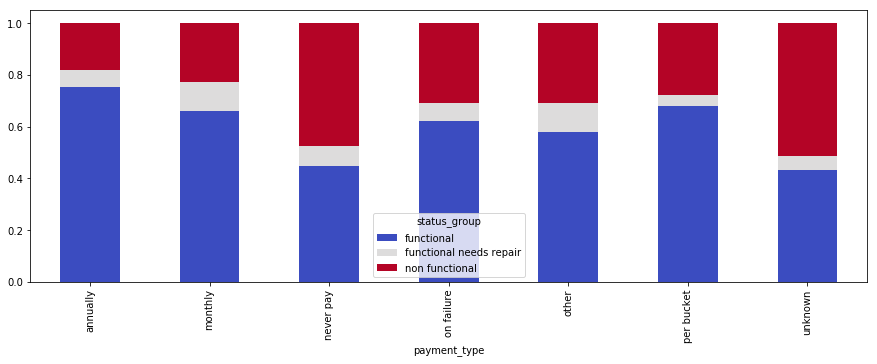

In [157]:
pd.crosstab(df['payment_type'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [49]:
# Payment and payment_type are redundant, payment_type will be removed.

df.drop(['payment_type'], axis = 1, inplace = True)

### water_quality

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64


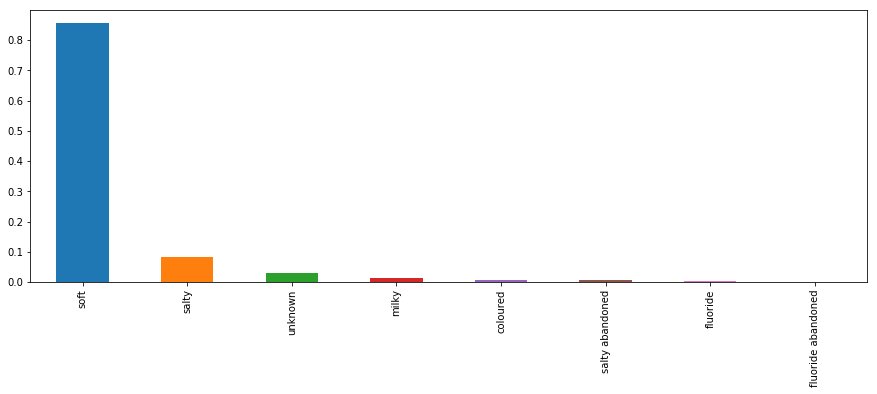

In [160]:
print(df['water_quality'].value_counts(normalize = True))
df['water_quality'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

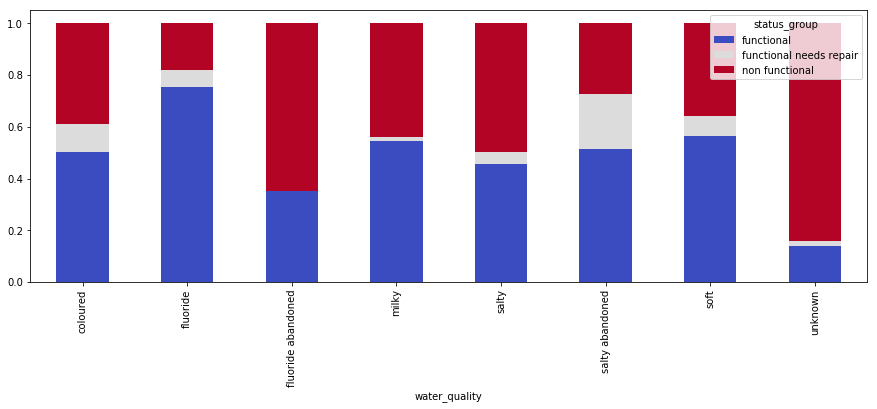

In [161]:
pd.crosstab(df['water_quality'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### quality_group

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64


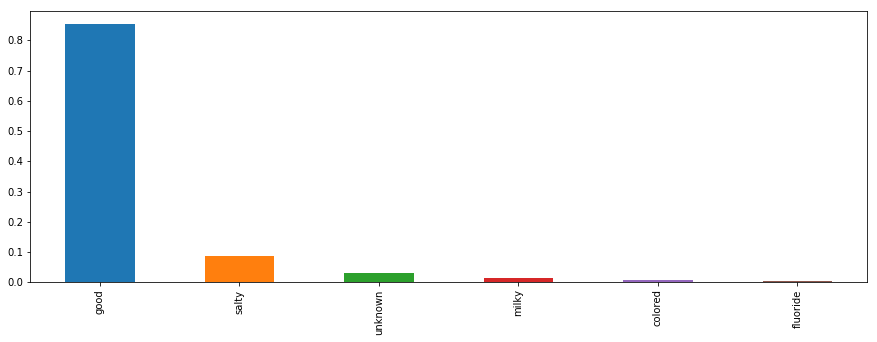

In [163]:
print(df['quality_group'].value_counts(normalize = True))
df['quality_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

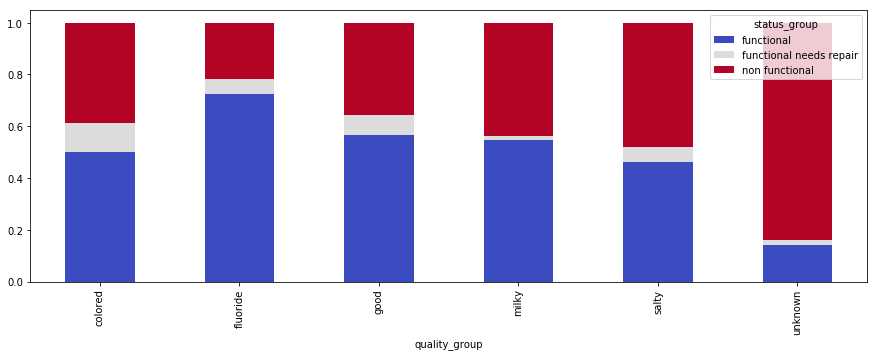

In [162]:
pd.crosstab(df['quality_group'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [50]:
# Water_quality and quality_group are redundant, quality_group will be removed.

df.drop(['quality_group'], axis = 1, inplace = True)

### quantity

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity, dtype: float64


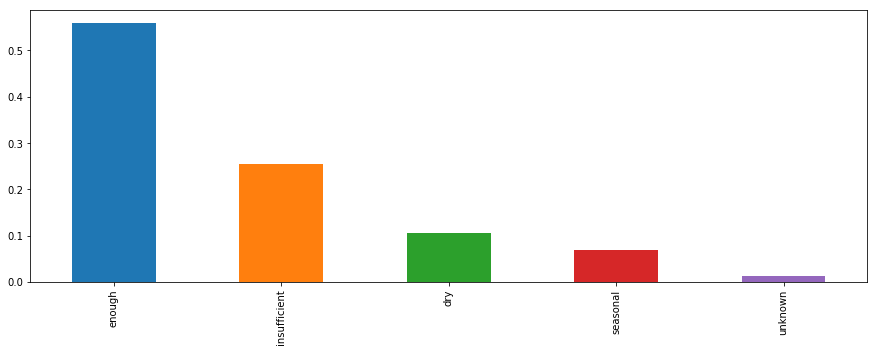

In [165]:
print(df['quantity'].value_counts(normalize = True))
df['quantity'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

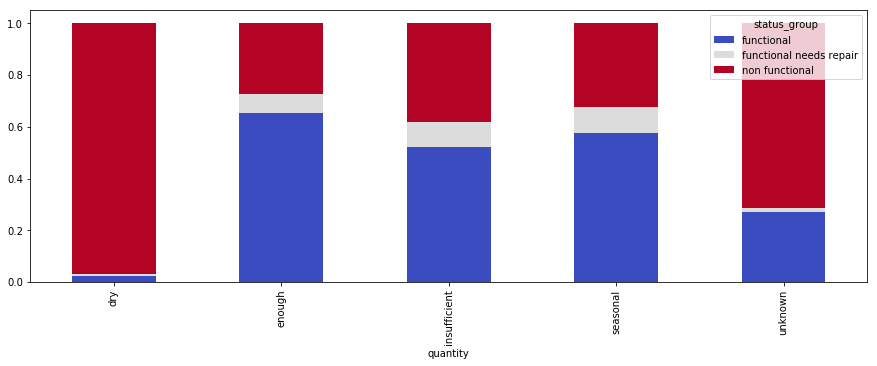

In [166]:
pd.crosstab(df['quantity'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### quantity_group

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity_group, dtype: float64


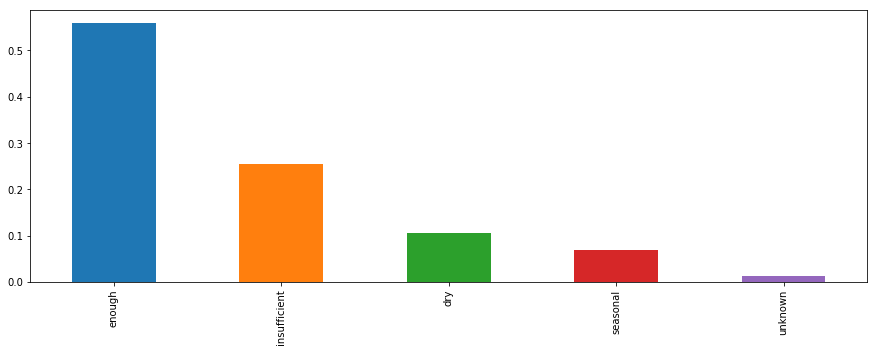

In [168]:
print(df['quantity_group'].value_counts(normalize = True))
df['quantity_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

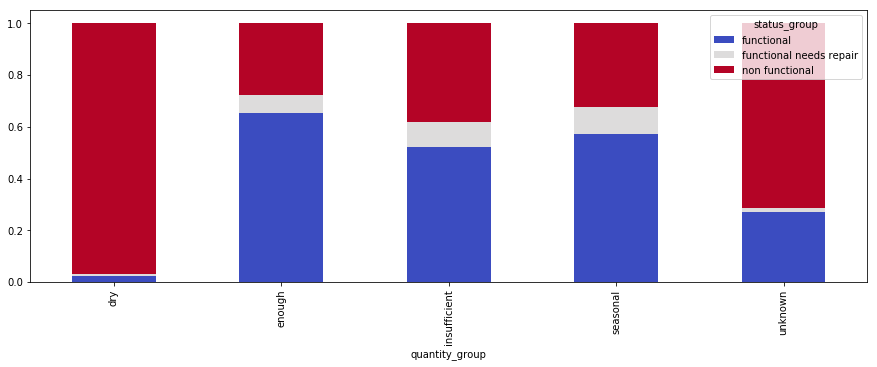

In [167]:
pd.crosstab(df['quantity_group'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [51]:
# Quantity and quantity_group are redundant, quantity_group will be removed.

df.drop(['quantity_group'], axis = 1, inplace = True)

### source

spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: source, dtype: float64


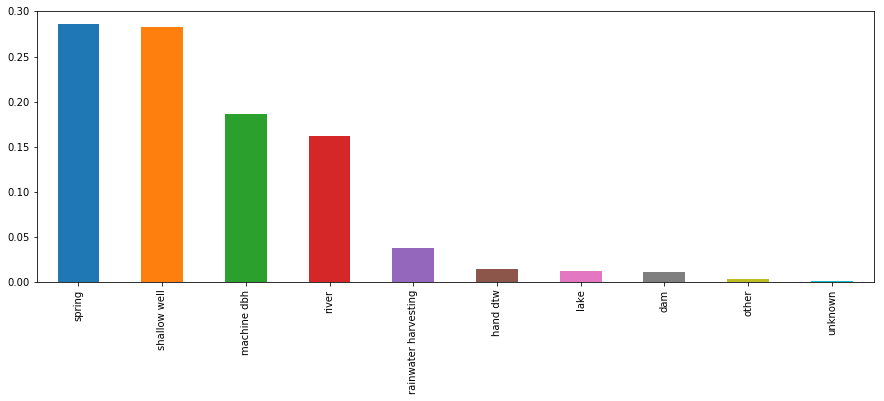

In [170]:
print(df['source'].value_counts(normalize = True))
df['source'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

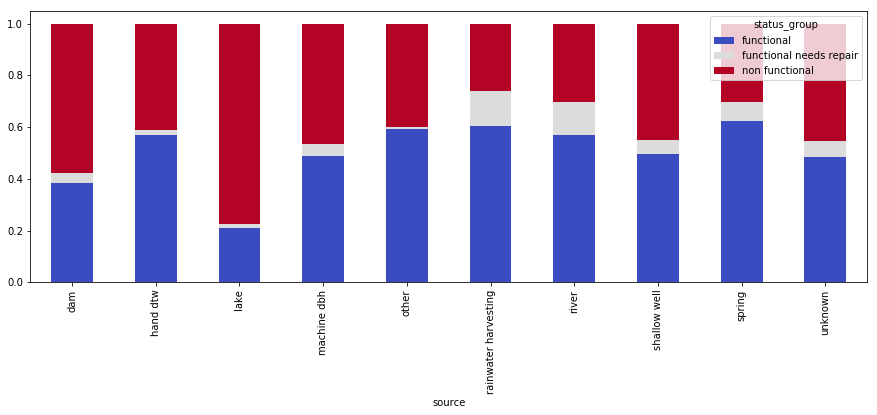

In [171]:
pd.crosstab(df['source'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### source_type

spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: source_type, dtype: float64


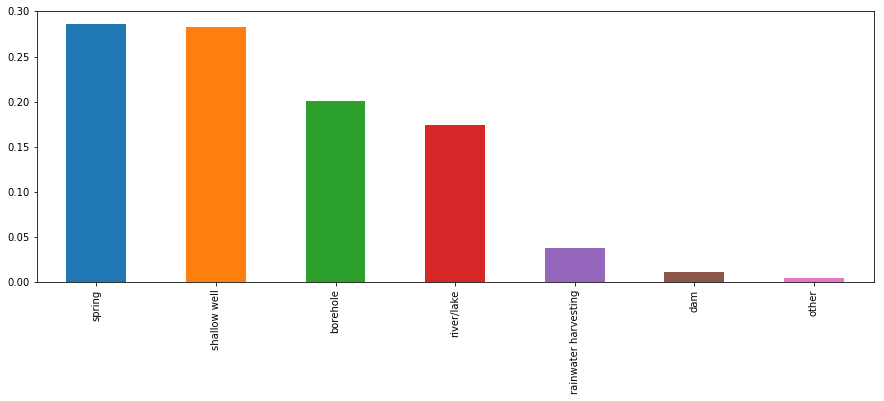

In [173]:
print(df['source_type'].value_counts(normalize = True))
df['source_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

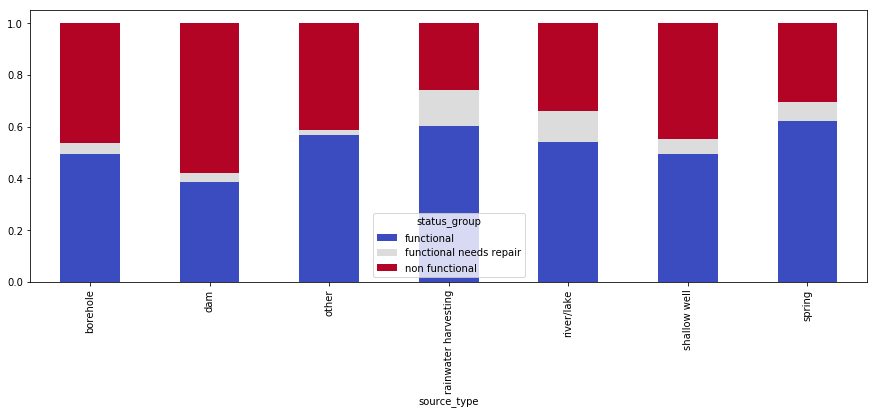

In [172]:
pd.crosstab(df['source_type'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### source_class

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64


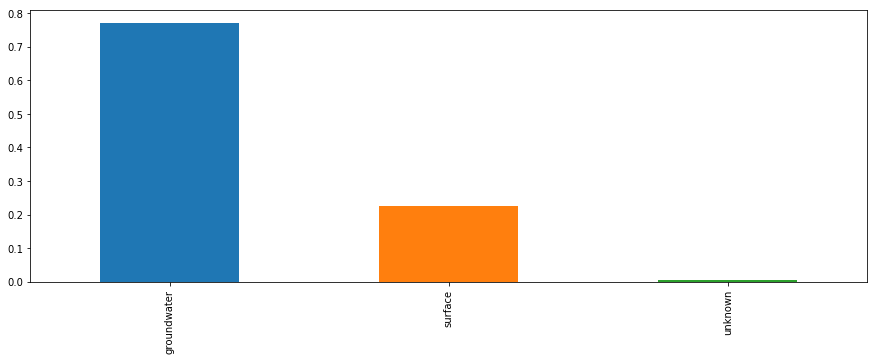

In [174]:
print(df['source_class'].value_counts(normalize = True))
df['source_class'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

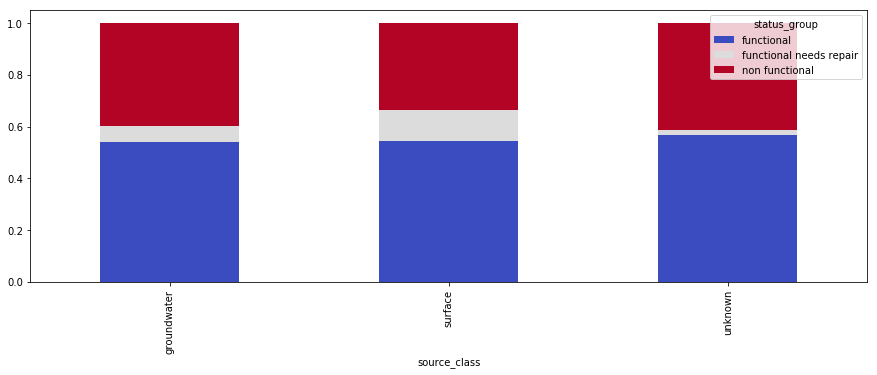

In [175]:
pd.crosstab(df['source_class'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [52]:
# Source and source_type are redundant, source_type will be removed. Source_class has an even distribution of outcome
# so it be removed as well.

df.drop(columns = ['source_type', 'source_class'], axis = 1, inplace = True)

### waterpoint_type

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: waterpoint_type, dtype: float64


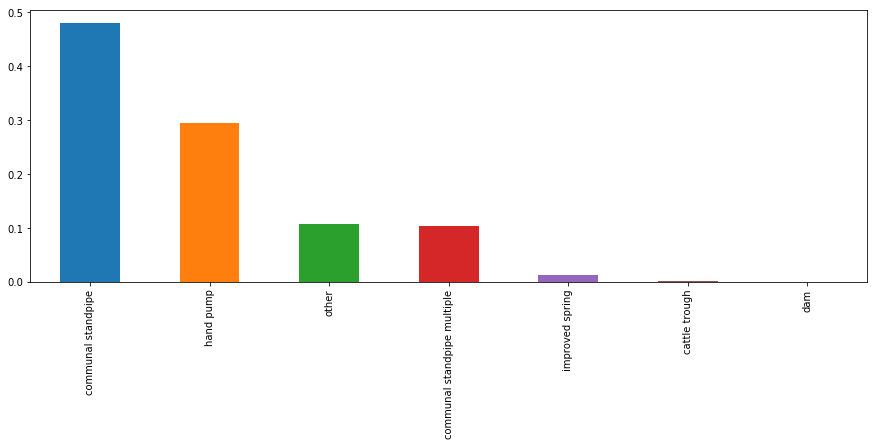

In [178]:
print(df['waterpoint_type'].value_counts(normalize = True))
df['waterpoint_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

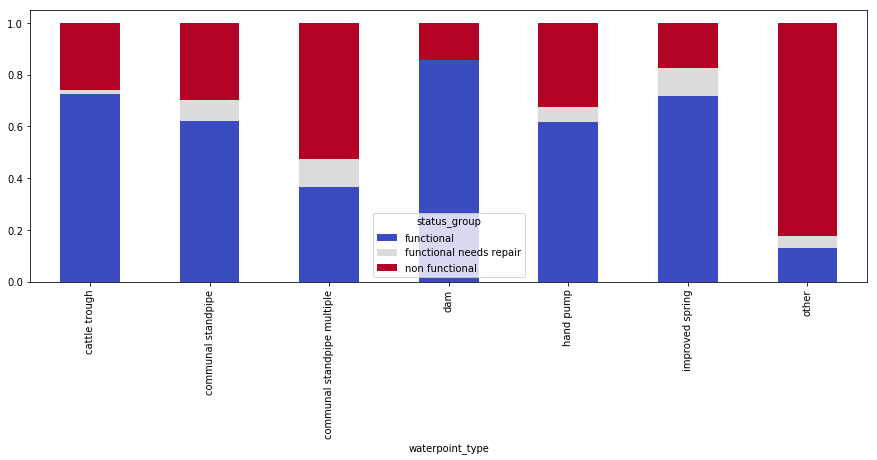

In [177]:
pd.crosstab(df['waterpoint_type'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

### waterpoint_type_group

communal standpipe    0.582912
hand pump             0.294411
other                 0.107407
improved spring       0.013199
cattle trough         0.001953
dam                   0.000118
Name: waterpoint_type_group, dtype: float64


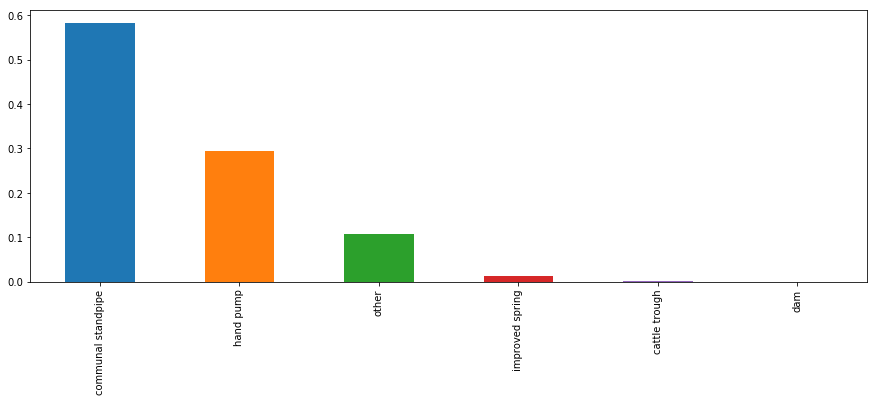

In [180]:
print(df['waterpoint_type_group'].value_counts(normalize = True))
df['waterpoint_type_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

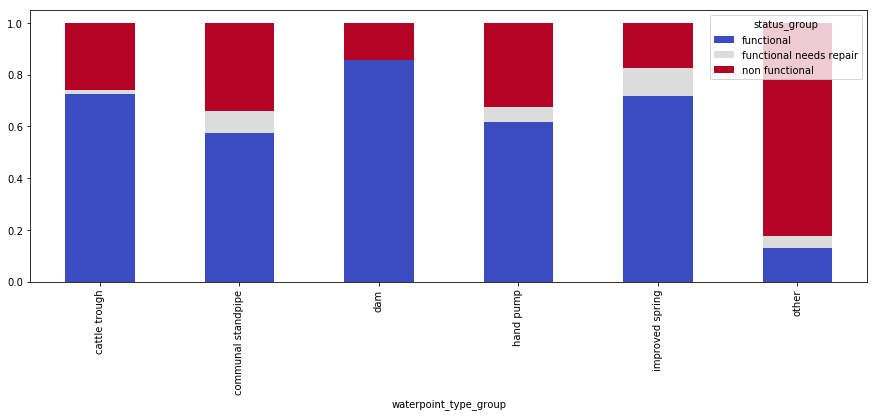

In [181]:
pd.crosstab(df['waterpoint_type_group'], df['status_group'], normalize = 'index').plot(kind='bar', stacked=True, 
                                                                        colormap='coolwarm', figsize =(15,5))

In [53]:
# Waterpoint_type and waterpoint_type_group are redundant so waterpoint_type_group will be removed.

df.drop(['waterpoint_type_group'], axis = 1, inplace = True)

## Data Cleaning Verification

In [67]:
df.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,well_age,status_group,top_funded,top_installers,top_wpt_name,top_ward,top_subvillage,top_scheme_name
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,12,functional,Roman,other,none,other,other,Roman
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,other,Other,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3,functional,other,other,Zahanati,other,other,other
2,25.0,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,4,functional,other,World Vision,other,other,Majengo,other
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,27,non functional,Unicef,UNICEF,other,other,other,other
4,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,other,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,12,functional,other,other,Shuleni,other,other,other


In [54]:
# Drop funder and installer because new features were added with their clean data.

df.drop(columns = ['funder', 'installer', 'wpt_name', 'ward'], axis = 1, inplace = True)

In [60]:
df.drop(['subvillage'], axis = 1, inplace = True)

In [66]:
df.drop(['scheme_name'], axis = 1, inplace = True)

In [61]:
# Verify correct columns are all present

df.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,scheme_name,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,well_age,status_group,top_funded,top_installers,top_wpt_name,top_ward,top_subvillage
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,Roman,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,12,functional,Roman,other,none,other,other
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,other,Other,other,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3,functional,other,other,Zahanati,other,other
2,25.0,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,Nyumba ya mungu pipe scheme,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,4,functional,other,World Vision,other,other,Majengo
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,other,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,27,non functional,Unicef,UNICEF,other,other,other
4,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,other,other,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,12,functional,other,other,Shuleni,other,other


In [70]:
# Inspect remaining columns for any null values. 

df.isnull().sum()

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
population               0
public_meeting           0
scheme_management        0
extraction_type_class    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
well_age                 0
status_group             0
top_funded               0
top_installers           0
top_wpt_name             0
top_ward                 0
top_subvillage           0
top_scheme_name          0
dtype: int64

In [53]:
# Inspect column data types. 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 22 columns):
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
population               59400 non-null int64
scheme_management        59400 non-null object
extraction_type_class    59400 non-null object
management               59400 non-null object
payment                  59400 non-null object
water_quality            59400 non-null object
quantity                 59400 non-null object
source                   59400 non-null object
waterpoint_type          59400 non-null object
well_age                 59400 non-null int64


### The following files are only to be saved after passing specific values through certain DF columns

In [190]:
# Save altered dataframe to import in a new notebook for modeling.

#df.to_csv('clean_training_set', index = False)

In [57]:
# Save experimental df with higher funder and installer values [100] for modeling

#df.to_csv('experimental1_training_set', index = False)

In [54]:
# Save experimental df with lower funder and installer values [25] for modeling

#df.to_csv('experimental2_training_set', index = False)

In [71]:
# Save experimental df with added columns 

#df.to_csv('all_features_training_set', index = False)